In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 200)

## Read and load data

##### Loading the Application data  from csv

In [3]:
applicationData = pd.read_csv("application_data.csv", encoding="unicode_escape")

#### Inspecting Application_Data dataframe (shape, info, describe etc.) 

In [4]:
applicationData.size

37516342

In [5]:
applicationData.shape

(307511, 122)

In [6]:
applicationData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
applicationData.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [8]:
applicationData.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Column wise null percentages

### Inspecting the Application_Data dataframe. Calculating the null percentages in each column

In [9]:
#Calculating the column wise null percentages and roundinng off to 2 decimal places
def getColumnWiseNulls():
    colWiseNulls = round(100*(applicationData.isnull().sum()/len(applicationData.index)), 2)
    colWiseNulls.sort_values(ascending=False, inplace=True)
    return colWiseNulls

In [10]:
def plotColumnWiseNulls(lowerRange=0, upperRange=100):
    res = getColumnWiseNulls()
    plt.figure(figsize=(20,4))
    res[(res>=lowerRange)&(res<=upperRange)].plot.bar()

In [11]:
applicationData_Null = getColumnWiseNulls()
applicationData_Null

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_MEDI        69.43
NONLIVINGAPARTMENTS_AVG         69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MEDI           68.35
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
FLOORSMIN_MEDI                  67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_AVG                   67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_AVG                 66.50
YEARS_BUILD_MODE                66.50
OWN_CAR_AGE                     65.99
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
LANDAREA_MEDI                   59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MEDI              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

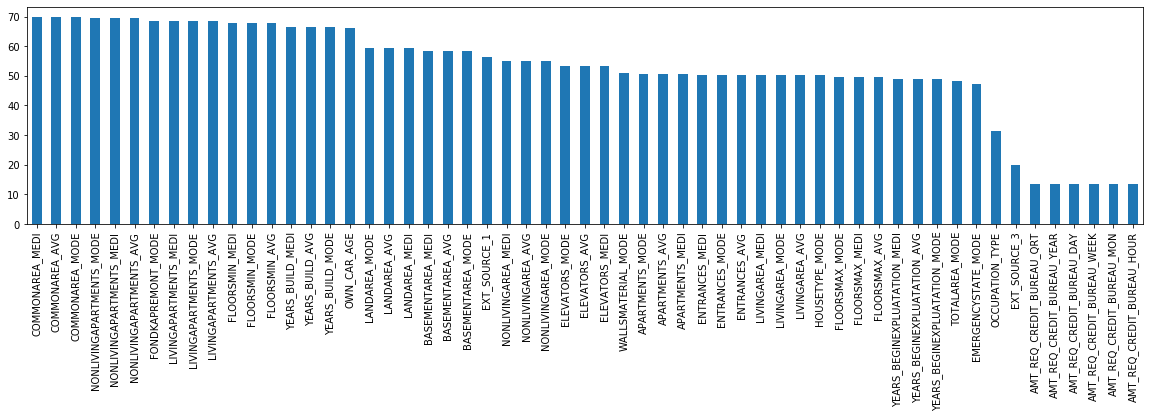

In [12]:
plotColumnWiseNulls(1) ## columns with atleast 1% nulls

## Handling column wise Null values 
- Clearly, this dataframe has a high null percentages for a number of columns. Removing all the columns having null percentage greater than 50.

In [13]:
#Get the list of columns that need to be dropped (Null percent > 50)
Cols_To_Drop = list(applicationData_Null[applicationData_Null.values>=50].index)
applicationData.drop(labels=Cols_To_Drop, inplace=True , axis=1)
len(Cols_To_Drop)

41

In [14]:
#Verify if the required columns have been dropped
applicationData.shape

(307511, 81)

### Observation
- 81 columns remain. Hence, 122 - 81 = 41 columns have been dropped

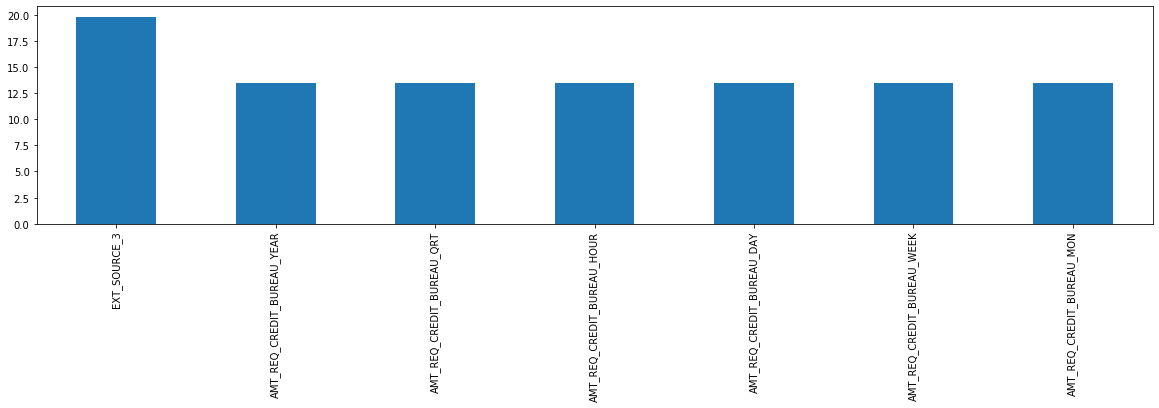

In [15]:
plotColumnWiseNulls(10, 30) ##only plot columns with null values between 10% and 30%

### Imputing values in columns

#### For columns with small null percentages, say less than 15%, we will impute some value

In [16]:
applicationData_Null = getColumnWiseNulls()
applicationData_Null[(applicationData_Null>0)&(applicationData_Null<15)]

AMT_REQ_CREDIT_BUREAU_YEAR    13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
NAME_TYPE_SUITE                0.42
DEF_60_CNT_SOCIAL_CIRCLE       0.33
OBS_30_CNT_SOCIAL_CIRCLE       0.33
DEF_30_CNT_SOCIAL_CIRCLE       0.33
OBS_60_CNT_SOCIAL_CIRCLE       0.33
EXT_SOURCE_2                   0.21
AMT_GOODS_PRICE                0.09
dtype: float64

#### NAME_FAMILY_STATUS

In [17]:
applicationData['NAME_FAMILY_STATUS'].value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

### Observation
- There are 2 rows with value as unknown. We can drop these rows

In [18]:
applicationData = applicationData[applicationData['NAME_FAMILY_STATUS']!='Unknown']

In [19]:
#Verify that the rows were successfully dropped
applicationData['NAME_FAMILY_STATUS'].value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Name: NAME_FAMILY_STATUS, dtype: int64

#### AMT_REQ_CREDIT_BUREAU_HOUR

In [20]:
#Checking the unique values in AMT_REQ_CREDIT_BUREAU_HOUR and check for null values
applicationData['AMT_REQ_CREDIT_BUREAU_HOUR'].unique()

array([ 0., nan,  1.,  2.,  3.,  4.])

In [21]:
print(applicationData['AMT_REQ_CREDIT_BUREAU_HOUR'].describe())
applicationData['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts()

count    265991.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64


0.0    264365
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

### Observation
- Since both median and mode are 0, it is safe to fill nulls with 0. Mean cannot work out here since the number of enquiries cannot be fractional

In [22]:
applicationData.loc[applicationData['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull(),'AMT_REQ_CREDIT_BUREAU_HOUR']=0

In [23]:
#Verify the changes
applicationData['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull().sum()

0

#### For imputing columns AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK , AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR following logic is being used.

- we have computed a metric (median/mode) for each column. Specific selection of metric is mentioned near the code for selection
- After that we select max of the queries made during a smaller time period or the metric selected in above step. For example - for AMT_REQ_CREDIT_BUREAU_WEEK, we have computed the median value, but if there are any queries made during last day and if that number is more than median, we choose that number as those queries are part of the week.

In [24]:
# generic function to impute based on above logic
import math
def fillNaForCreditInquries(row,currentColumn, previousColumn, altValue):
    if math.isnan(row[currentColumn]):
        res = max(row[previousColumn], altValue)
    else:
        res=  row[currentColumn]
    return res

#### AMT_REQ_CREDIT_BUREAU_DAY

In [25]:
applicationData['AMT_REQ_CREDIT_BUREAU_DAY'].describe()

count    265991.000000
mean          0.007000
std           0.110758
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [26]:
print(applicationData['AMT_REQ_CREDIT_BUREAU_DAY'].isnull().sum())

41518


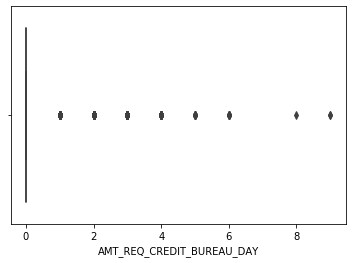

In [27]:
sns.boxplot(x='AMT_REQ_CREDIT_BUREAU_DAY', data=applicationData)

In [28]:
# For imputation we use daily data. If hourly review is available and greater than 0 we use that else we impute with median/mode(both are 0)
applicationData['AMT_REQ_CREDIT_BUREAU_DAY'] = applicationData.apply(fillNaForCreditInquries, axis=1, args=('AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR', 0))
print(applicationData['AMT_REQ_CREDIT_BUREAU_DAY'].isnull().sum())

0


#### AMT_REQ_CREDIT_BUREAU_WEEK 

In [29]:
applicationData['AMT_REQ_CREDIT_BUREAU_WEEK'].describe()

count    265991.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [30]:
applicationData['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull().sum()

41518

In [31]:
applicationData['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts(normalize=True)*100

0.0    96.790869
1.0     3.085819
2.0     0.074815
3.0     0.021805
4.0     0.012782
6.0     0.007519
5.0     0.003760
8.0     0.001880
7.0     0.000752
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

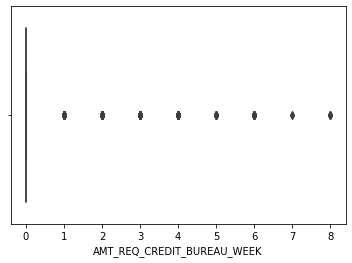

In [32]:
sns.boxplot(x='AMT_REQ_CREDIT_BUREAU_WEEK', data=applicationData)

In [33]:
# For imputation we use weekly data. If daily review is available and greater than 0 we use that else we impute with median/mode
applicationData['AMT_REQ_CREDIT_BUREAU_WEEK'] = applicationData.apply(fillNaForCreditInquries, axis=1, args=('AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY', 0))
applicationData['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull().sum()

0

#### AMT_REQ_CREDIT_BUREAU_MON 

In [34]:
applicationData['AMT_REQ_CREDIT_BUREAU_MON'].describe()

count    265991.000000
mean          0.267396
std           0.916004
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [35]:
applicationData['AMT_REQ_CREDIT_BUREAU_MON'].isnull().sum()

41518

In [36]:
applicationData['AMT_REQ_CREDIT_BUREAU_MON'].value_counts()

0.0     222232
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
27.0         1
22.0         1
23.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

### Observation
- values greater than 11 can be considered outliers as the number of values are considerably low

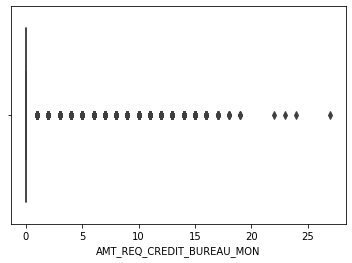

In [37]:
sns.boxplot(x='AMT_REQ_CREDIT_BUREAU_MON', data=applicationData)

In [38]:
applicationData['AMT_REQ_CREDIT_BUREAU_MON'].isnull().sum()

41518

In [39]:
# For imputation we use monthly data. If weekly is available and greater than 0 we use that else we impute with median/mode
applicationData['AMT_REQ_CREDIT_BUREAU_MON'] = applicationData.apply(fillNaForCreditInquries, axis=1, args=('AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK', 0))
applicationData['AMT_REQ_CREDIT_BUREAU_MON'].isnull().sum()

0

#### AMT_REQ_CREDIT_BUREAU_QRT 

In [40]:
applicationData['AMT_REQ_CREDIT_BUREAU_QRT'].describe()

count    265991.000000
mean          0.265475
std           0.794057
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [41]:
applicationData['AMT_REQ_CREDIT_BUREAU_QRT'].isnull().sum()

41518

In [42]:
applicationData['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()

0.0      215416
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
7.0           7
8.0           7
19.0          1
261.0         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

### Observation
- Values of 19, 261 is a clear outlier. Also there is only 1 record each with such values hence we can consider deleting or capping it later

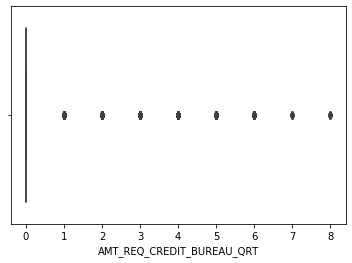

In [43]:
sns.boxplot(x='AMT_REQ_CREDIT_BUREAU_QRT', data=applicationData[applicationData['AMT_REQ_CREDIT_BUREAU_QRT']<19])

In [44]:
# For imputation we use quarterly data. If monthly review is available and greater than 0 we use that else we impute with median/mode
applicationData['AMT_REQ_CREDIT_BUREAU_QRT'] = applicationData.apply(fillNaForCreditInquries, axis=1, args=('AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_MON', 0))
applicationData['AMT_REQ_CREDIT_BUREAU_QRT'].isnull().sum()

0

### NAME_TYPE_SUITE

In [45]:
print(applicationData['NAME_TYPE_SUITE'].isnull().sum())
print(100*applicationData['NAME_TYPE_SUITE'].isnull().sum()/len(applicationData.index))

1290
0.4194999170755978


In [46]:
applicationData['NAME_TYPE_SUITE'].describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

In [47]:
applicationData['NAME_TYPE_SUITE'].value_counts(normalize=True)

Unaccompanied      0.811596
Family             0.131112
Spouse, partner    0.037130
Children           0.010669
Other_B            0.005780
Other_A            0.002828
Group of people    0.000885
Name: NAME_TYPE_SUITE, dtype: float64

### Observation 
 - over 81% of the clients visited for loan unaccompanied. 
 - only 0.4% values are unknown in this column so is safe to impute these as unaccompanied

In [48]:
applicationData['NAME_TYPE_SUITE'].replace(np.nan, 'Unaccompanied', inplace=True)

In [49]:
print(applicationData['NAME_TYPE_SUITE'].isnull().sum())
print(100*applicationData['NAME_TYPE_SUITE'].isnull().sum()/len(applicationData.index))

0
0.0


In [50]:
applicationData['NAME_TYPE_SUITE'].value_counts(normalize=True)

Unaccompanied      0.812386
Family             0.130562
Spouse, partner    0.036975
Children           0.010624
Other_B            0.005756
Other_A            0.002816
Group of people    0.000881
Name: NAME_TYPE_SUITE, dtype: float64

## Subset Dataframe 
Subsetting the applicationData dataframe to get relevant 30 columns as per our understanding for further analysis.

    Selected the following columns:
    1. SK_ID_CURR
    2. TARGET
    3. NAME_CONTRACT_TYPE
    4. CODE_GENDER
    5. FLAG_OWN_REALTY
    6. CNT_CHILDREN
    7. AMT_INCOME_TOTAL
    8. AMT_CREDIT
    9. AMT_ANNUITY
    10. NAME_INCOME_TYPE
    11. NAME_EDUCATION_TYPE
    12. NAME_FAMILY_STATUS
    13. REGION_POPULATION_RELATIVE
    14. DAYS_BIRTH
    15. DAYS_EMPLOYED
    16. FLAG_MOBIL
    17. FLAG_CONT_MOBILE
    18. OCCUPATION_TYPE
    19. CNT_FAM_MEMBERS
    20. REGION_RATING_CLIENT_W_CITY
    21. WEEKDAY_APPR_PROCESS_START
    22. REG_REGION_NOT_LIVE_REGION
    23. ORGANIZATION_TYPE
    24. EXT_SOURCE_2
    25. DEF_30_CNT_SOCIAL_CIRCLE
    26. DAYS_LAST_PHONE_CHANGE
    27. FLAG_DOCUMENT_2
    28. FLAG_DOCUMENT_3
    29. AMT_REQ_CREDIT_BUREAU_HOUR
    30. AMT_REQ_CREDIT_BUREAU_WEEK

In [51]:
#Subsetting the Application_Data dataframe toget the required columns
required_Columns = ['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY',
                   'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'NAME_INCOME_TYPE',
                   'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
                   'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_CONT_MOBILE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
                   'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
                   'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
                   'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_WEEK']

revised_Application_Data = applicationData[required_Columns]

In [52]:
#Verfiy Revised dataframe after subsetting
revised_Application_Data.shape

(307509, 30)

#### Checking the data types of selected columns in Revised_Application_Data

In [53]:
revised_Application_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307509 entries, 0 to 307510
Data columns (total 30 columns):
SK_ID_CURR                     307509 non-null int64
TARGET                         307509 non-null int64
NAME_CONTRACT_TYPE             307509 non-null object
CODE_GENDER                    307509 non-null object
FLAG_OWN_REALTY                307509 non-null object
CNT_CHILDREN                   307509 non-null int64
AMT_INCOME_TOTAL               307509 non-null float64
AMT_CREDIT                     307509 non-null float64
AMT_ANNUITY                    307497 non-null float64
NAME_INCOME_TYPE               307509 non-null object
NAME_EDUCATION_TYPE            307509 non-null object
NAME_FAMILY_STATUS             307509 non-null object
REGION_POPULATION_RELATIVE     307509 non-null float64
DAYS_BIRTH                     307509 non-null int64
DAYS_EMPLOYED                  307509 non-null int64
FLAG_MOBIL                     307509 non-null int64
FLAG_CONT_MOBILE           

<font color="blue">As observed, following columns have incorrect data types:</font>
    1. CNT_FAM_MEMBERS (Float) should be int64
    2. DEF_30_CNT_SOCIAL_CIRCLE (Float) should be int64
    3. DAYS_LAST_PHONE_CHANGE (Float) should be int64
    4. AMT_REQ_CREDIT_BUREAU_HOUR (Float) should be int64
    5. AMT_REQ_CREDIT_BUREAU_WEEK (Float) should be int64
    6. CODE_GENDER (Object) should be category
    7. NAME_EDUCATION_TYPE (Object) should be catgory
    8. OCCUPATION_TYPE (Object) should be category
    9. ORGANIZATION_TYPE (Object) should be category

### Fixing to correct data type of columns

In [54]:
#Fixing the data type for CNT_FAM_MEMBERS, DEF_30_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE,
#AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_WEEK
revised_Application_Data.CNT_FAM_MEMBERS = revised_Application_Data.CNT_FAM_MEMBERS.astype('Int64')
revised_Application_Data.DEF_30_CNT_SOCIAL_CIRCLE = revised_Application_Data.DEF_30_CNT_SOCIAL_CIRCLE.astype('Int64')
revised_Application_Data.DAYS_LAST_PHONE_CHANGE = revised_Application_Data.DAYS_LAST_PHONE_CHANGE.astype('Int64')
revised_Application_Data.AMT_REQ_CREDIT_BUREAU_HOUR = revised_Application_Data.AMT_REQ_CREDIT_BUREAU_HOUR.astype('Int64')
revised_Application_Data.AMT_REQ_CREDIT_BUREAU_WEEK = revised_Application_Data.AMT_REQ_CREDIT_BUREAU_WEEK.astype('Int64')
revised_Application_Data.CODE_GENDER = revised_Application_Data.CODE_GENDER.astype('category')
revised_Application_Data.NAME_EDUCATION_TYPE = revised_Application_Data.NAME_EDUCATION_TYPE.astype('category')
revised_Application_Data.OCCUPATION_TYPE = revised_Application_Data.OCCUPATION_TYPE.astype('category')
revised_Application_Data.ORGANIZATION_TYPE = revised_Application_Data.ORGANIZATION_TYPE.astype('category')

In [55]:
#Verify the changes in our Revised_Application_Data
revised_Application_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307509 entries, 0 to 307510
Data columns (total 30 columns):
SK_ID_CURR                     307509 non-null int64
TARGET                         307509 non-null int64
NAME_CONTRACT_TYPE             307509 non-null object
CODE_GENDER                    307509 non-null category
FLAG_OWN_REALTY                307509 non-null object
CNT_CHILDREN                   307509 non-null int64
AMT_INCOME_TOTAL               307509 non-null float64
AMT_CREDIT                     307509 non-null float64
AMT_ANNUITY                    307497 non-null float64
NAME_INCOME_TYPE               307509 non-null object
NAME_EDUCATION_TYPE            307509 non-null category
NAME_FAMILY_STATUS             307509 non-null object
REGION_POPULATION_RELATIVE     307509 non-null float64
DAYS_BIRTH                     307509 non-null int64
DAYS_EMPLOYED                  307509 non-null int64
FLAG_MOBIL                     307509 non-null int64
FLAG_CONT_MOBILE       

<font color="blue">Data types of the following columns have been fixed:</font>
- CNT_FAM_MEMBERS - int64
- DEF_30_CNT_SOCIAL_CIRCLE - int64
- DAYS_LAST_PHONE_CHANGE - int64
- AMT_REQ_CREDIT_BUREAU_HOUR - int64
- AMT_REQ_CREDIT_BUREAU_WEEK - int64
- CODE_GENDER - category
- NAME_EDUCATION_TYPE - category
- OCCUPATION_TYPE - category
- ORGANIZATION_TYPE - category

## Outlier Handling
#### CNT_CHILDREN

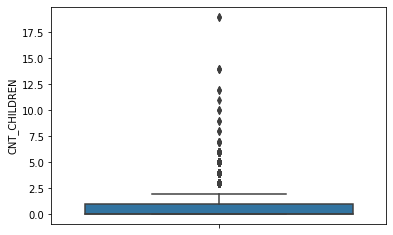

In [56]:
#We will boxplot numerical type columns and observe for outliers

#Outlier Handling for CNT_CHILDREN
sns.boxplot(y = revised_Application_Data.CNT_CHILDREN, data = revised_Application_Data)

In [57]:
revised_Application_Data.CNT_CHILDREN.value_counts()

0     215369
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

In [58]:
revised_Application_Data.CNT_CHILDREN.quantile([0.75, 0.90, 0.99])

0.75    1.0
0.90    2.0
0.99    3.0
Name: CNT_CHILDREN, dtype: float64

### Observation
- As observed, 99 percentile of data have 3 children and there are only a few data points till 5, so it safe to remove rows with CNT_CHILDREN greater than 5.

In [59]:
#Keeping only those rows where CNT_CHILDREN <= 5
revised_Application_Data = revised_Application_Data[revised_Application_Data.CNT_CHILDREN <= 5]


#Verify the CNT_CHILDREN column again after dropping rows
revised_Application_Data.CNT_CHILDREN.value_counts()

0    215369
1     61119
2     26749
3      3717
4       429
5        84
Name: CNT_CHILDREN, dtype: int64

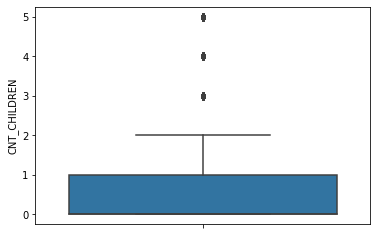

In [60]:
sns.boxplot(y = revised_Application_Data.CNT_CHILDREN.dropna(), data = revised_Application_Data)

#### Observation
- The above data point observed at CNT_CHILDREN = 3, 4,  5 is not considered as an outlier as it is just a high value for CNT_CHILDREN which is normal

#### AMT_CREDIT

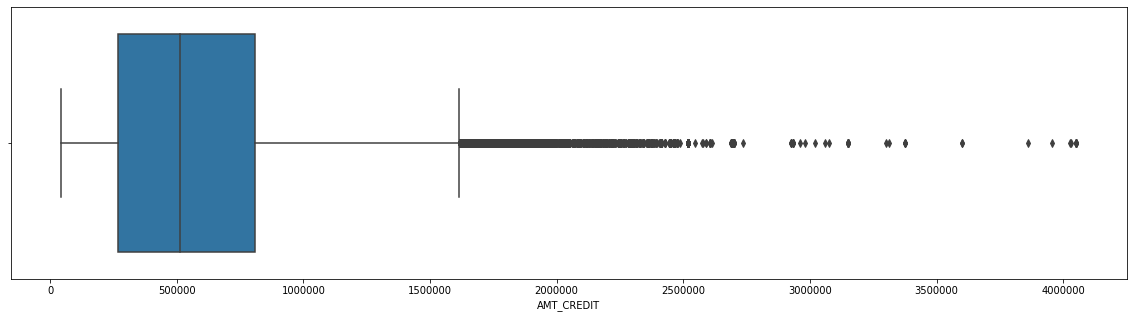

In [61]:
#Outlier Handling for AMT_CREDIT
plt.figure(figsize=[20,5])
sns.boxplot(x = revised_Application_Data.AMT_CREDIT.dropna(), data = revised_Application_Data)
#Graph of derived attribute, ratio of applied/credit - Harnoor

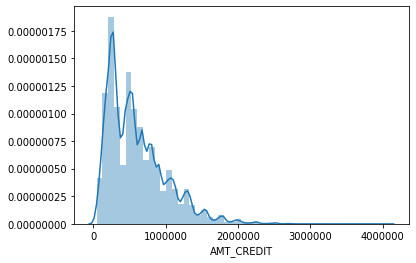

In [62]:
sns.distplot(revised_Application_Data.AMT_CREDIT.dropna())

- From the above plots, we can see that values greater than 3500000 can be outlier as they are far from quartile ranges

In [63]:
#Using z-score to find outliers
#while calculating the Z-score we re-scale and center the data and look for data points which are too far from zero. 
#These data points which are way too far from zero will be treated as the outliers. 
#In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 
#respectively, that data point will be identified as outliers.

#Importing the required libraries for calculating z-score
from scipy import stats

In [64]:
z_score = np.abs(stats.zscore(revised_Application_Data.AMT_CREDIT))
print(z_score)

#Setting the threshold value at 3
threshold = 3

[0.47811252 1.72537682 1.15288851 ... 0.19534421 0.56877209 0.18872558]


In [65]:
#Percentage of values where z_score > threshold
round(len(revised_Application_Data.AMT_CREDIT[(z_score > threshold)]) / len(revised_Application_Data) * 100, 2)

1.06

In [66]:
#keeping only those rows where z_score <= threshold since the percentage of outliers is too less, 1.06
revised_Application_Data.AMT_CREDIT = revised_Application_Data.AMT_CREDIT[(z_score <= threshold)]

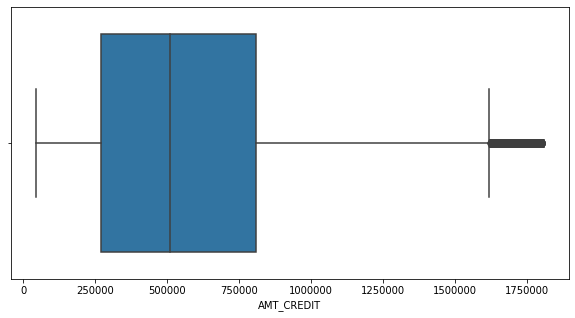

In [67]:
#Verify the plot again after removing outliers
plt.figure(figsize=[10,5])
sns.boxplot(x = revised_Application_Data.AMT_CREDIT.dropna(), data = revised_Application_Data)

#### REGION_POPULATION_RELATIVE 

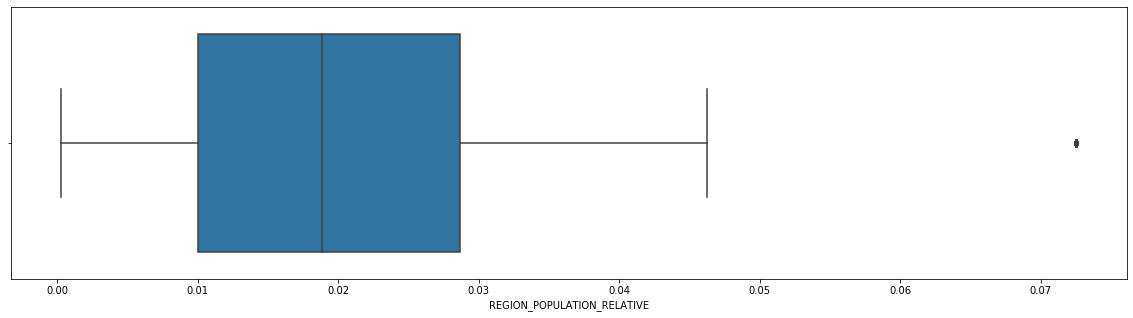

In [68]:
#Outlier Handling for REGION_POPULATION_RELATIVE
plt.figure(figsize=[20,5])
sns.boxplot(x = revised_Application_Data.REGION_POPULATION_RELATIVE.dropna(), data = revised_Application_Data)

    From the above plot, values greater than 0.07 appear to be outliers

In [69]:
#Using z score to find and handle outliers
z_score = np.abs(stats.zscore(revised_Application_Data.REGION_POPULATION_RELATIVE))
print(z_score)

#Setting the threshold value at 3
threshold = 3

[0.14949319 1.25277397 0.783482   ... 1.14714532 1.12466037 1.83286957]


In [70]:
#Percentage of values where z_score > threshold
round(len(revised_Application_Data.REGION_POPULATION_RELATIVE[(z_score > threshold)]) / len(revised_Application_Data) * 100, 2)


2.74

In [71]:
#keeping only those rows where z_score <= threshold since the percentage of outliers is too less, 2.74
revised_Application_Data.REGION_POPULATION_RELATIVE = revised_Application_Data.REGION_POPULATION_RELATIVE[(z_score <= threshold)]


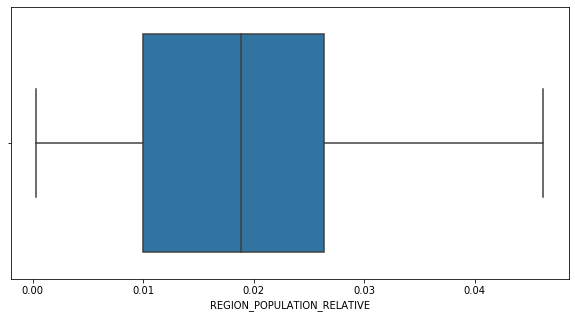

In [72]:
#Verify the plot again after removing outliers
plt.figure(figsize=[10,5])
sns.boxplot(x = revised_Application_Data.REGION_POPULATION_RELATIVE.dropna(), data = revised_Application_Data)

#### Observation
- The above data point observed at REGION_POPULATION_RELATIVE = 0.072508 is not considered as an outlier as the difference between max and 99 percentile is zero and the count of data points is reltively high, 8397, so the observed data point is considered a high value

#### DAYS_EMPLOYED

In [73]:
### convert to positive for easier analysis 
revised_Application_Data.DAYS_BIRTH =abs(revised_Application_Data.DAYS_BIRTH)
revised_Application_Data.DAYS_EMPLOYED =abs(revised_Application_Data.DAYS_EMPLOYED)

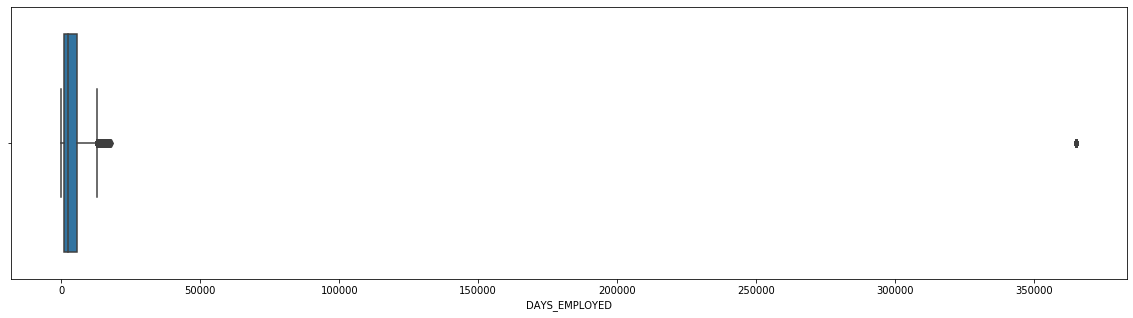

In [74]:
#Outlier Handling for DAYS_EMPLOYED
plt.figure(figsize=[20,5])
sns.boxplot(x = revised_Application_Data.DAYS_EMPLOYED.dropna(), data = revised_Application_Data)

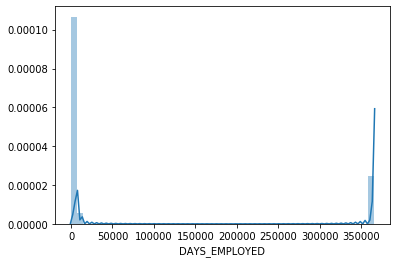

In [75]:
sns.distplot(revised_Application_Data.DAYS_EMPLOYED.dropna())

In [76]:
#Using z score to find and handle outliers
z_score = np.abs(stats.zscore(revised_Application_Data.DAYS_EMPLOYED))
print(z_score)

#Setting the threshold value at 3
threshold = 3

[0.48113585 0.47718457 0.48409035 ... 0.42890146 0.4513829  0.47665391]


In [77]:
#Percentage of values where z_score > threshold
round(len(revised_Application_Data.DAYS_EMPLOYED[(z_score > threshold)]) / len(revised_Application_Data) * 100, 2)

0.0

#### Observation
- Since the z_score is less than 3 for all values, the datapoints above 350000 which seemed to be outliers are actually high just high values
- The above data point observed at DAYS_EMPLOYED = 365243 is not considered as an outlier as the difference between max and 99 percentile is zero and the count of data points is reltively high, 55353, so the observed data point is considered a high value
- However, number of days a person is employeed should not be more than age of the person. Let's look at this perspective now

In [78]:
### records where days employeed is more than days birth. 
len(revised_Application_Data[abs(revised_Application_Data.DAYS_EMPLOYED)>=abs(revised_Application_Data.DAYS_BIRTH)])

55371

In [79]:
revised_Application_Data[revised_Application_Data.DAYS_EMPLOYED>=revised_Application_Data.DAYS_BIRTH].groupby('NAME_INCOME_TYPE')['SK_ID_CURR'].count()

NAME_INCOME_TYPE
Pensioner     55349
Unemployed       22
Name: SK_ID_CURR, dtype: int64

In [80]:
temp = revised_Application_Data.loc[(revised_Application_Data.DAYS_EMPLOYED>=revised_Application_Data.DAYS_BIRTH)&(revised_Application_Data.NAME_INCOME_TYPE=='Pensioner'), ['DAYS_EMPLOYED', 'DAYS_BIRTH']]
temp.DAYS_EMPLOYED.value_counts()

365243    55349
Name: DAYS_EMPLOYED, dtype: int64

### Observation
- Unemployed people have filled in higher values. We can impute DAYS_EMPLOYED for these as 0
- Pensioners also have high days_employed values. Also, it is worth noting that all the pensioners are filled with same value. So it might be a consious decision to use this value. We might want to discuss this with business before imputing or treating them.

In [81]:
revised_Application_Data.loc[(revised_Application_Data.DAYS_EMPLOYED>=revised_Application_Data.DAYS_BIRTH)&(revised_Application_Data.NAME_INCOME_TYPE=='Unemployed'), ['DAYS_EMPLOYED']]= 0

## Creating Bins 

### AMT_INCOME_TOTAL(Income of the client)

In [82]:
revised_Application_Data.AMT_INCOME_TOTAL.value_counts()

135000.0    35747
112500.0    31011
157500.0    26552
180000.0    24716
90000.0     22480
            ...  
101119.5        1
79425.0         1
101128.5        1
202275.0        1
262174.5        1
Name: AMT_INCOME_TOTAL, Length: 2548, dtype: int64

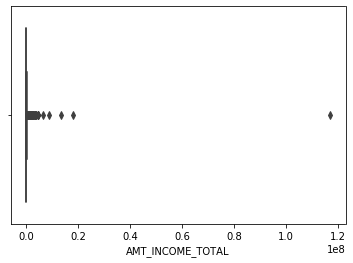

In [83]:
sns.boxplot(revised_Application_Data['AMT_INCOME_TOTAL'])

In [84]:
revised_Application_Data['AMT_INCOME_TOTAL'].describe()

count    3.074670e+05
mean     1.687997e+05
std      2.371379e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [85]:
revised_Application_Data['AMT_INCOME_TOTAL'].quantile([0,.1,.2,.25,.5,.75,.9,.95,.99,1])

0.00        25650.0
0.10        81000.0
0.20        99000.0
0.25       112500.0
0.50       147150.0
0.75       202500.0
0.90       270000.0
0.95       337500.0
0.99       472500.0
1.00    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

### Observation
- There is an incremental increase in income ranges. There are some indiviuals with high incomes but those are around 0.1% . Around 20% have income less than 1,00,000. 50% have income less than 1,50,000 75% population has income less than 2,00,000. Similarly there can be division on basis of 50000 income difference.

In [86]:
cut_bins = [0,50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 1000000, 1050000]
cut_labels = [ '<=50k', '50k-1 lac', '1 lac-1.5 lac', '1.5 lac-2 lac','2lac-2.5lac', '2.5lac-3lac', '3lac-3.5lac', '3.5lac-4lac', '4lac-4.5lac', '4.5lac-5lac', '5lac-10lac', '>10lac']
revised_Application_Data['income_bins'] = pd.cut(revised_Application_Data['AMT_INCOME_TOTAL'].clip(upper=1000001), bins=cut_bins,include_lowest =True, labels=cut_labels)
res = revised_Application_Data[['income_bins', 'AMT_INCOME_TOTAL']]

In [87]:
revised_Application_Data['income_bins'].value_counts()

1 lac-1.5 lac    91577
1.5 lac-2 lac    64299
50k-1 lac        59173
2lac-2.5lac      48130
2.5lac-3lac      17038
3lac-3.5lac       8871
3.5lac-4lac       5802
4lac-4.5lac       4923
<=50k             4515
5lac-10lac        2452
4.5lac-5lac        437
>10lac             250
Name: income_bins, dtype: int64

#### DAYS_BIRTH 

In [88]:
revised_Application_Data['DAYS_BIRTH'].value_counts()

13749    43
13481    42
10020    41
18248    41
15771    40
         ..
7861      1
25017     1
25135     1
7856      1
24328     1
Name: DAYS_BIRTH, Length: 17460, dtype: int64

In [89]:
revised_Application_Data[revised_Application_Data['DAYS_BIRTH']>0]['DAYS_BIRTH'].value_counts()

13749    43
13481    42
10020    41
18248    41
15771    40
         ..
7861      1
25017     1
25135     1
7856      1
24328     1
Name: DAYS_BIRTH, Length: 17460, dtype: int64

### Observation
- We have observed that most days are mentioned in -ve. We are converting them to +ve and then convert to years to find age. We will then bin them

In [90]:
# revised_Application_Data['DAYS_BIRTH'] = -revised_Application_Data['DAYS_BIRTH'] 

revised_Application_Data['AGE'] = round(abs(revised_Application_Data['DAYS_BIRTH'])/365, 2)
revised_Application_Data['AGE'].head()

0    25.92
1    45.93
2    52.18
3    52.07
4    54.61
Name: AGE, dtype: float64

In [91]:
revised_Application_Data['AGE'].describe()

count    307467.000000
mean         43.937398
std          11.956637
min          20.520000
25%          34.010000
50%          43.150000
75%          53.920000
max          69.120000
Name: AGE, dtype: float64

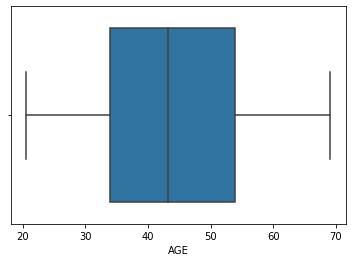

In [92]:
sns.boxplot(revised_Application_Data['AGE'])

In [93]:
revised_Application_Data['AGE'].quantile([0,.1,.2,.25,.5,.75,.9,.95,.99,1])

0.00    20.52
0.10    28.18
0.20    32.04
0.25    34.01
0.50    43.15
0.75    53.92
0.90    60.77
0.95    63.57
0.99    66.90
1.00    69.12
Name: AGE, dtype: float64

### Observation
- looking at above plot and quantile range values, it is clear that age is very continuously distributed variable. It also seems logical to create bins of size 10

In [94]:
cut_bins = list(range(0,80,10))
cut_bins

[0, 10, 20, 30, 40, 50, 60, 70]

In [95]:
cut_labels = ['<=10', '10-20', '20-30', '30-40', '40-50','50-60', '>60']
revised_Application_Data['AgeGroup'] = pd.cut(revised_Application_Data['AGE'].clip(upper=71), bins=cut_bins,include_lowest =True, labels=cut_labels)
res = revised_Application_Data[['AgeGroup', 'AGE']]

In [96]:
res['AgeGroup'].value_counts()

30-40    82302
40-50    76502
50-60    68064
20-30    45038
>60      35561
10-20        0
<=10         0
Name: AgeGroup, dtype: int64

# Imbalance Percentage 

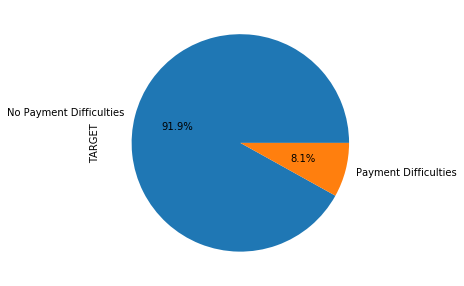

In [182]:
plt.figure(figsize=(5,5))
revised_Application_Data.TARGET.value_counts(normalize=True).plot.pie(autopct='%1.1f%%', labels=['No Payment Difficulties', 'Payment Difficulties'])


In [98]:
revised_Application_Data.TARGET.value_counts(normalize=True) * 100

0    91.92889
1     8.07111
Name: TARGET, dtype: float64

### Subsetting the Revised_Application_Data into Target = 1 and Target = 0 dataframe

In [99]:
#Filtering out rows with Target = 1 in Revised_Application_Data 
revised_App_Data_Target_1 = revised_Application_Data[(revised_Application_Data.TARGET == 1)]

#Filtering out rows with Target = 0 in Revised_Application_Data 
revised_App_Data_Target_0 = revised_Application_Data[(revised_Application_Data.TARGET == 0)]

In [100]:
#Verify that the dataframe was correctly sliced
print("With TARGET(1) " + str(len(revised_App_Data_Target_1)))
print("With TARGET(0) " + str(len(revised_App_Data_Target_0)))

print("Sum of subsets " + str(len(revised_App_Data_Target_1) + len(revised_App_Data_Target_0)))
print()
print("Length of original dataframe " + str(len(revised_Application_Data)))

With TARGET(1) 24816
With TARGET(0) 282651
Sum of subsets 307467

Length of original dataframe 307467


## Univariate Analysis on Revised_Application_Data

#### NAME_CONTRACT_TYPE  - Categorical unordered

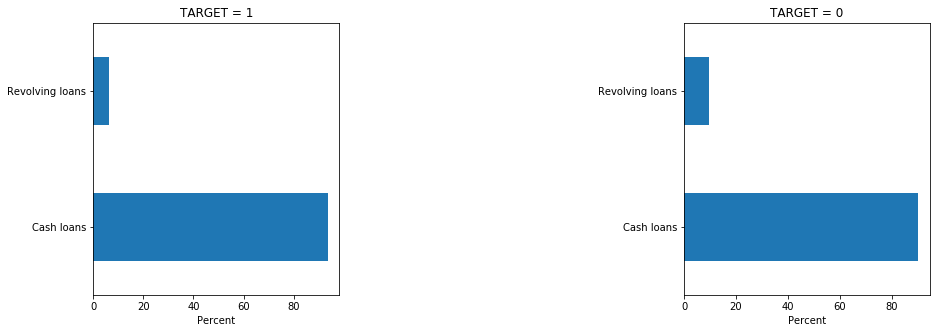

In [101]:
#NAME_CONTRACT_TYPE is an unorder categorical column
#Plotting bar graph of percentages for TARGET = 1 and TARGET = 0
plt.figure(figsize=[15,5])
plt.subplot(131)
plt.xlabel("Percent")
plt.title("TARGET = 1")
(revised_App_Data_Target_1.NAME_CONTRACT_TYPE.value_counts(normalize=True)*100).plot.barh()
plt.subplot(133)
plt.xlabel("Percent")
plt.title("TARGET = 0")
(revised_App_Data_Target_0.NAME_CONTRACT_TYPE.value_counts(normalize=True)*100).plot.barh()
plt.show()

### Definition
- As per the defination, Cash debt is a loan with a set payment schedule over several months or years. After you set up your revolving loan, the lender tells you the maximum you can borrow. You can borrow money whenever you need it, pay it back on your schedule, then borrow again.

### Observation
- There are slightly more data points for TARGET = 0, where clients had no difficulty in payment for revolving loans. So, clients who opted for revolving loans are slightly more likely to pay back without difficulty
- There is not much difference in percentage of people choosing for Cash loan for both TARGET = 0 and TARGET = 1. Hence, nothing can be said that for them in particular

#### CODE_GENDER - Categorical unordered

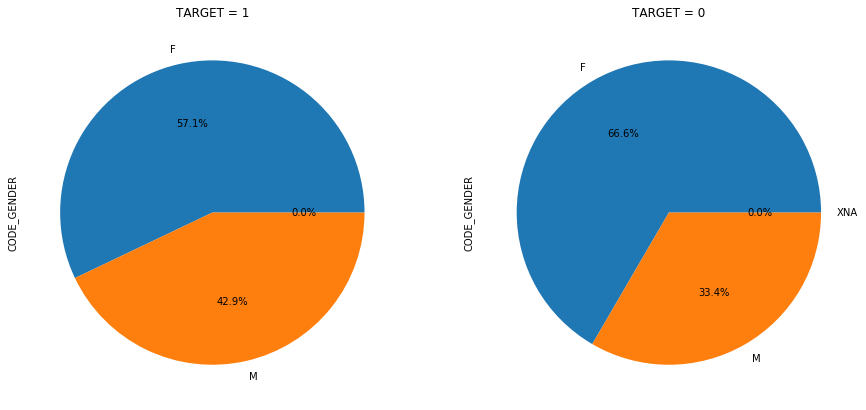

In [102]:
#CODE_GENDER is an unordered categorical column
#Plotting pie graph of percentages for TARGET = 1 and TARGET = 0
plt.figure(figsize=[15,15])
plt.subplot(121)
plt.title("TARGET = 1")
revised_App_Data_Target_1.CODE_GENDER.value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.subplot(122)
plt.title("TARGET = 0")
revised_App_Data_Target_0.CODE_GENDER.value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.show()

### Observation
- For clients who had payment difficulty, around 57% of them were females, whereas males were around 43%.
- For clients who had no payment difficulty, around 65% of them were females, whereas males were around 33.5%.

#### NAME_INCOME_TYPE  - Categorical unordered

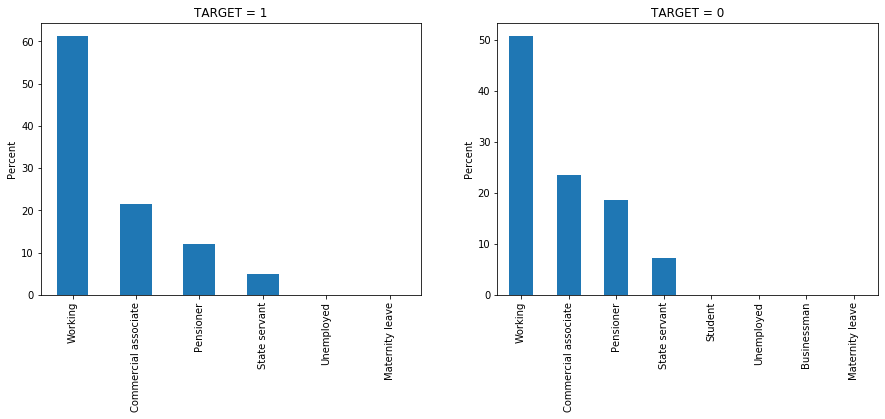

In [103]:
#CODE_GENDER is an unordered categorical column
#Plotting bar graph for TARGET = 1 and TARGET = 0
plt.figure(figsize=[15,5])
plt.subplot(121)
plt.ylabel("Percent")
plt.title("TARGET = 1")
(revised_App_Data_Target_1.NAME_INCOME_TYPE.value_counts(normalize=True)*100).plot.bar()
plt.subplot(122)
plt.ylabel("Percent")
plt.title("TARGET = 0")
(revised_App_Data_Target_0.NAME_INCOME_TYPE.value_counts(normalize=True)*100).plot.bar()
plt.show()

### Observation
- For clients who has payment difficulties, there were around 61% from working category. Similarly, for clients who paid back on time, a significantly lower, around 50% of them were from working category
- For clients who has payment difficulties, there were around 13% from pensioner category. Similarly, for clients who paid back on time, a slightly higher, around 20% of them were from pensioner category
- For all other Income Type, the spread is similar for both TARGET = 1 and TARGET = 0

#### CNT_CHILDREN - Categorical ordered 

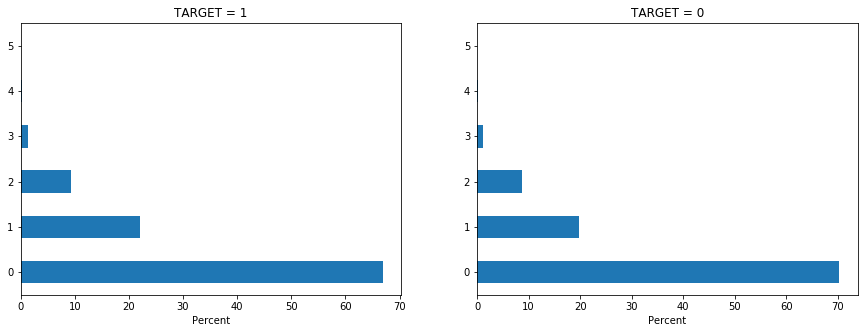

In [104]:
#NAME_CONTRACT_TYPE is an ordered categorical column
#Plotting bar graph for percentage for TARGET = 1 and TARGET = 0
plt.figure(figsize=[15, 5])
plt.subplot(121)
plt.xlabel("Percent")
plt.title("TARGET = 1")
(revised_App_Data_Target_1.CNT_CHILDREN.value_counts(normalize=True)*100).plot.barh()
plt.subplot(122)
plt.xlabel("Percent")
plt.title("TARGET = 0")
(revised_App_Data_Target_0.CNT_CHILDREN.value_counts(normalize=True)*100).plot.barh()
plt.show()

### Observation
- Clients with 0 children are slightly more likely to pay back loan on time(70%) as comapared to clients with 0 children who defaulted(68%)
- Clients with 1 child are slightly more likely to default(22%) as compared to clients who had 1 child and paid the loan on time(20%)

#### NAME_EDUCATION_TYPE - Categorical ordered 

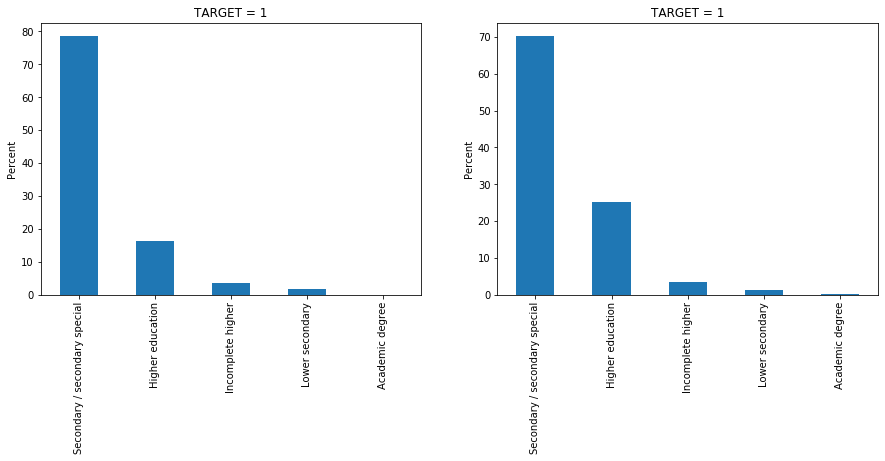

In [105]:
#NAME_EDUCATION_TYPE is an ordered categorical column
#Plotting bar graph for percentage for TARGET = 1
plt.figure(figsize=[15, 5])
plt.subplot(121)
plt.ylabel("Percent")
plt.title("TARGET = 1")
(revised_App_Data_Target_1.NAME_EDUCATION_TYPE.value_counts(normalize=True)*100).plot.bar()
plt.subplot(122)
plt.ylabel("Percent")
plt.title("TARGET = 1")
(revised_App_Data_Target_0.NAME_EDUCATION_TYPE.value_counts(normalize=True)*100).plot.bar()
plt.show()

### Observation
- Clients with "Secondary special" education are more likely to default(79%) as compared to clients with same education who paid back on time(70%)
- Clients with "Higher education" are significantly more likely to pay back loan on time(25%) than clients with same education who default(15%)
- Distribution for other education types are similar for both clients, who defaulted and who paid back on time

### Finding correlation for each data set 

In [106]:
NumericalColumns= ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE', 'AGE', 'DAYS_EMPLOYED']
NumericalColumns

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'REGION_POPULATION_RELATIVE',
 'AGE',
 'DAYS_EMPLOYED']

In [107]:
correlationSubsetTarget1 = revised_App_Data_Target_1[NumericalColumns]
correlationSubsetTarget0 = revised_App_Data_Target_0[NumericalColumns]

In [186]:
# Target =1 correlation
corr1= round(correlationSubsetTarget1.corr(),3)
corr1

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,AGE,DAYS_EMPLOYED
AMT_INCOME_TOTAL,1.000,0.035,0.046,0.002,-0.003,-0.015
AMT_CREDIT,0.035,1.000,0.739,0.039,0.137,0.006
AMT_ANNUITY,0.046,0.739,1.000,0.036,0.014,-0.081
REGION_POPULATION_RELATIVE,0.002,0.039,0.036,1.000,0.040,0.005
AGE,-0.003,0.137,0.014,0.040,1.000,0.582
DAYS_EMPLOYED,-0.015,0.006,-0.081,0.005,0.582,1.000


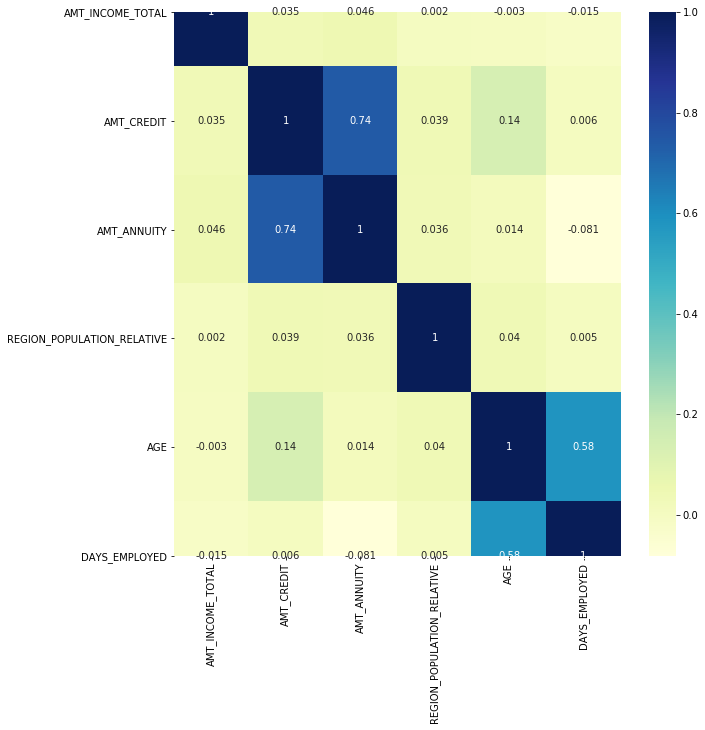

In [187]:
# figure size
plt.figure(figsize=(10,10))

# heatmap
sns.heatmap(corr1, cmap="YlGnBu", annot=True)
plt.show()

In [110]:
# Target =0 correlation
corr0= round(correlationSubsetTarget0.corr(),3)
corr0

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,AGE,DAYS_EMPLOYED
AMT_INCOME_TOTAL,1.000,0.313,0.419,0.078,-0.063,-0.140
AMT_CREDIT,0.313,1.000,0.756,0.047,0.050,-0.069
AMT_ANNUITY,0.419,0.756,1.000,0.060,-0.012,-0.105
REGION_POPULATION_RELATIVE,0.078,0.047,0.060,1.000,0.023,-0.014
AGE,-0.063,0.050,-0.012,0.023,1.000,0.626
DAYS_EMPLOYED,-0.140,-0.069,-0.105,-0.014,0.626,1.000


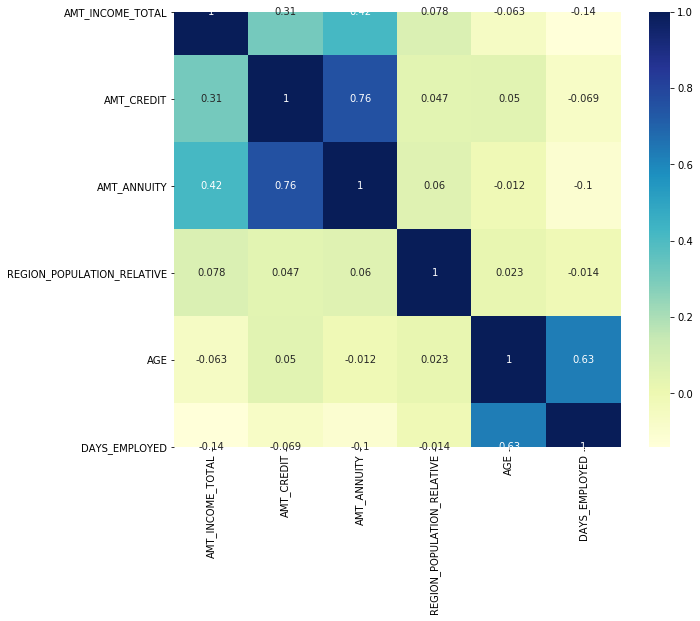

In [111]:
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(corr0, cmap="YlGnBu", annot=True)
plt.show()

### Correlation for TARGET 0

In [112]:
corrdf = corr0.where(np.triu(np.ones(corr0.shape), k=1).astype(np.bool)).unstack().reset_index()
corrdf.columns=['VAR1', 'VAR2', 'Correlation']
corrdf.dropna(subset=['Correlation'], inplace=True)
corrdf.sort_values('Correlation', ascending=False)

,VAR1,VAR2,Correlation
13,AMT_ANNUITY,AMT_CREDIT,0.756
34,DAYS_EMPLOYED,AGE,0.626
12,AMT_ANNUITY,AMT_INCOME_TOTAL,0.419
6,AMT_CREDIT,AMT_INCOME_TOTAL,0.313
18,REGION_POPULATION_RELATIVE,AMT_INCOME_TOTAL,0.078
20,REGION_POPULATION_RELATIVE,AMT_ANNUITY,0.060
25,AGE,AMT_CREDIT,0.050
19,REGION_POPULATION_RELATIVE,AMT_CREDIT,0.047
27,AGE,REGION_POPULATION_RELATIVE,0.023
26,AGE,AMT_ANNUITY,-0.012


### Correlation for TARGET 1

In [113]:
corrdf = corr1.where(np.triu(np.ones(corr1.shape), k=1).astype(np.bool)).unstack().reset_index()
corrdf.columns=['VAR1', 'VAR2', 'Correlation']
corrdf.dropna(subset=['Correlation'], inplace=True)
corrdf.sort_values('Correlation', ascending=False)

,VAR1,VAR2,Correlation
13,AMT_ANNUITY,AMT_CREDIT,0.739
34,DAYS_EMPLOYED,AGE,0.582
25,AGE,AMT_CREDIT,0.137
12,AMT_ANNUITY,AMT_INCOME_TOTAL,0.046
27,AGE,REGION_POPULATION_RELATIVE,0.040
19,REGION_POPULATION_RELATIVE,AMT_CREDIT,0.039
20,REGION_POPULATION_RELATIVE,AMT_ANNUITY,0.036
6,AMT_CREDIT,AMT_INCOME_TOTAL,0.035
26,AGE,AMT_ANNUITY,0.014
31,DAYS_EMPLOYED,AMT_CREDIT,0.006


### Observation

- AMT_CREDIT And AMT_ANNUITY have the highest correlation in both the data sets
- These are even more correlated for target 0 i.e for the cases where there is not default

## Univariate analysis for numerical columns

#### AGE

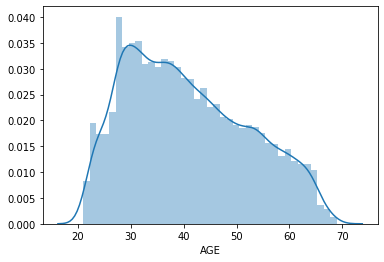

In [114]:
sns.distplot(revised_App_Data_Target_1['AGE'])

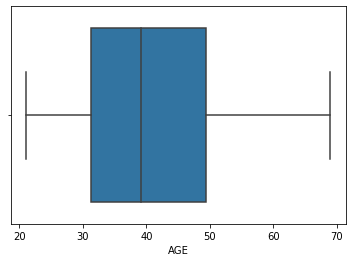

In [115]:
sns.boxplot(revised_App_Data_Target_1['AGE'])

### Observation

- Highest number of people who have applied for loan and defaulted are in age of 25-40 years.
- right skewed distribution indicates that higher age indiviuals tend to have less payment difficulties

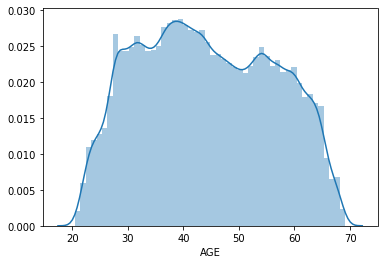

In [116]:
sns.distplot(revised_App_Data_Target_0['AGE'])

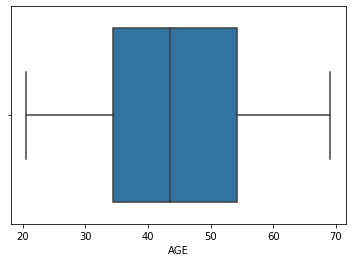

In [117]:
sns.boxplot(revised_App_Data_Target_0['AGE'])

### Observation

- For people with no payment difficulties data is relatively symmetrical.
- From given data we say that people of all ages are likely to pay back money. Therefore we should look at other parameters

#### AMT_INCOME_TOTAL

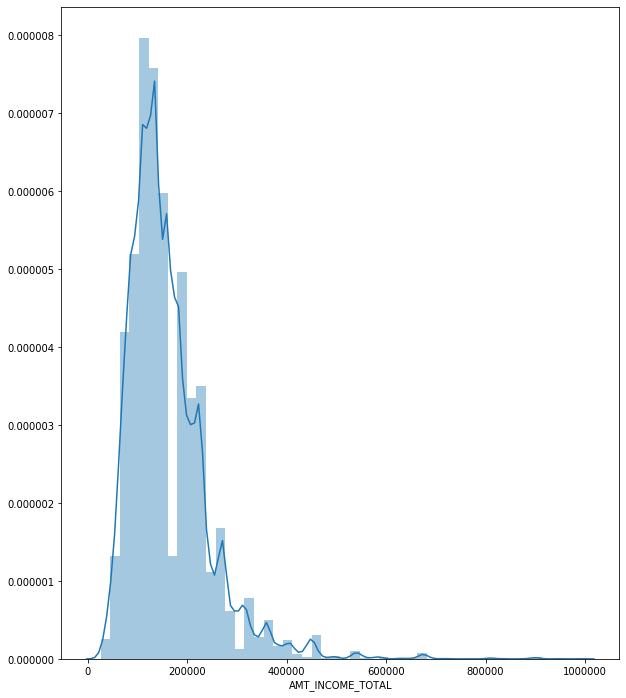

In [118]:
#TARGET = 1
plt.figure(figsize=(10,12))
sns.distplot(revised_App_Data_Target_1[revised_App_Data_Target_1['AMT_INCOME_TOTAL']<1000000]['AMT_INCOME_TOTAL'])

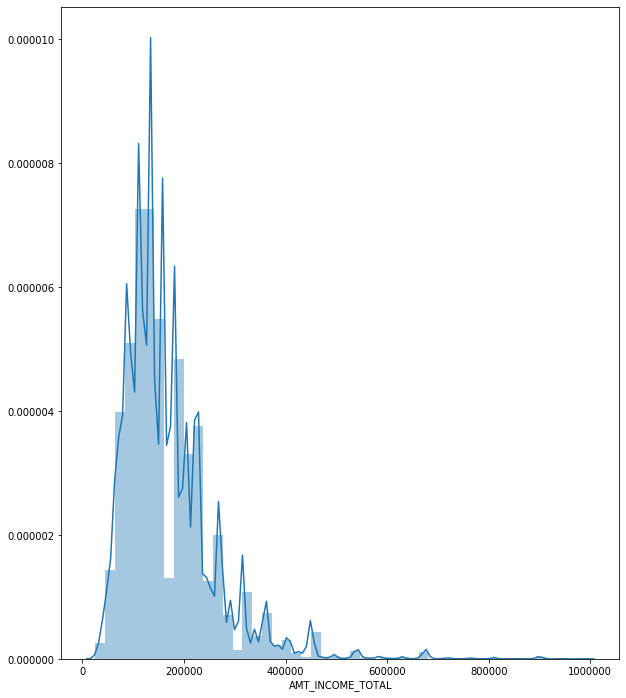

In [119]:
#TARGET = 0
plt.figure(figsize=(10,12))
sns.distplot(revised_App_Data_Target_0[revised_App_Data_Target_0['AMT_INCOME_TOTAL']<1000000]['AMT_INCOME_TOTAL'])

In [120]:
revised_App_Data_Target_1[revised_App_Data_Target_1['AMT_INCOME_TOTAL']<1000000]['AMT_INCOME_TOTAL'].describe()

count     24803.000000
mean     160230.494880
std       80991.043731
min       25650.000000
25%      112500.000000
50%      135000.000000
75%      202500.000000
max      990000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [121]:
revised_App_Data_Target_1['AMT_INCOME_TOTAL'].describe()

count    2.481600e+04
mean     1.656065e+05
std      7.468111e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.350000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

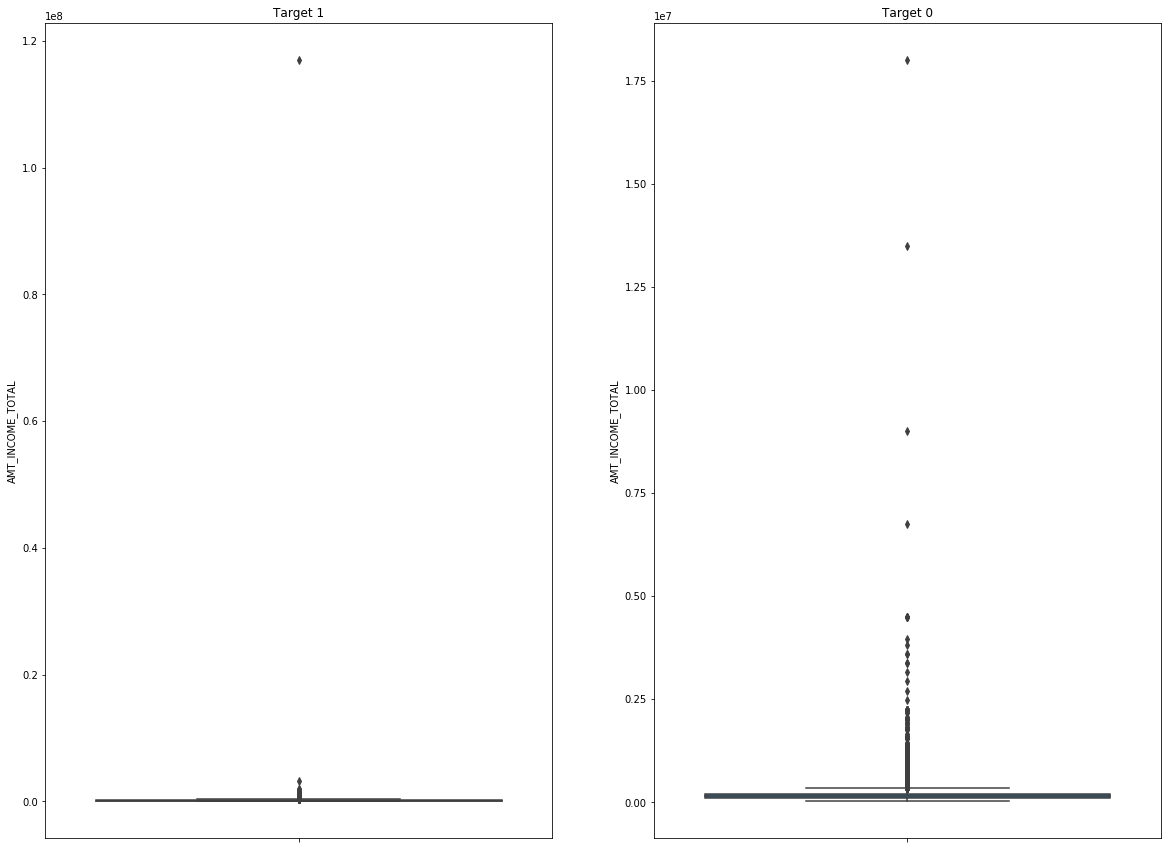

In [122]:
#For all incomes
plt.figure(figsize=(20,15))
plt.subplot(121)
plt.title('Target 1')
sns.boxplot(y=revised_App_Data_Target_1['AMT_INCOME_TOTAL'])
plt.subplot(122)
plt.title('Target 0')
sns.boxplot(y=revised_App_Data_Target_0['AMT_INCOME_TOTAL'])

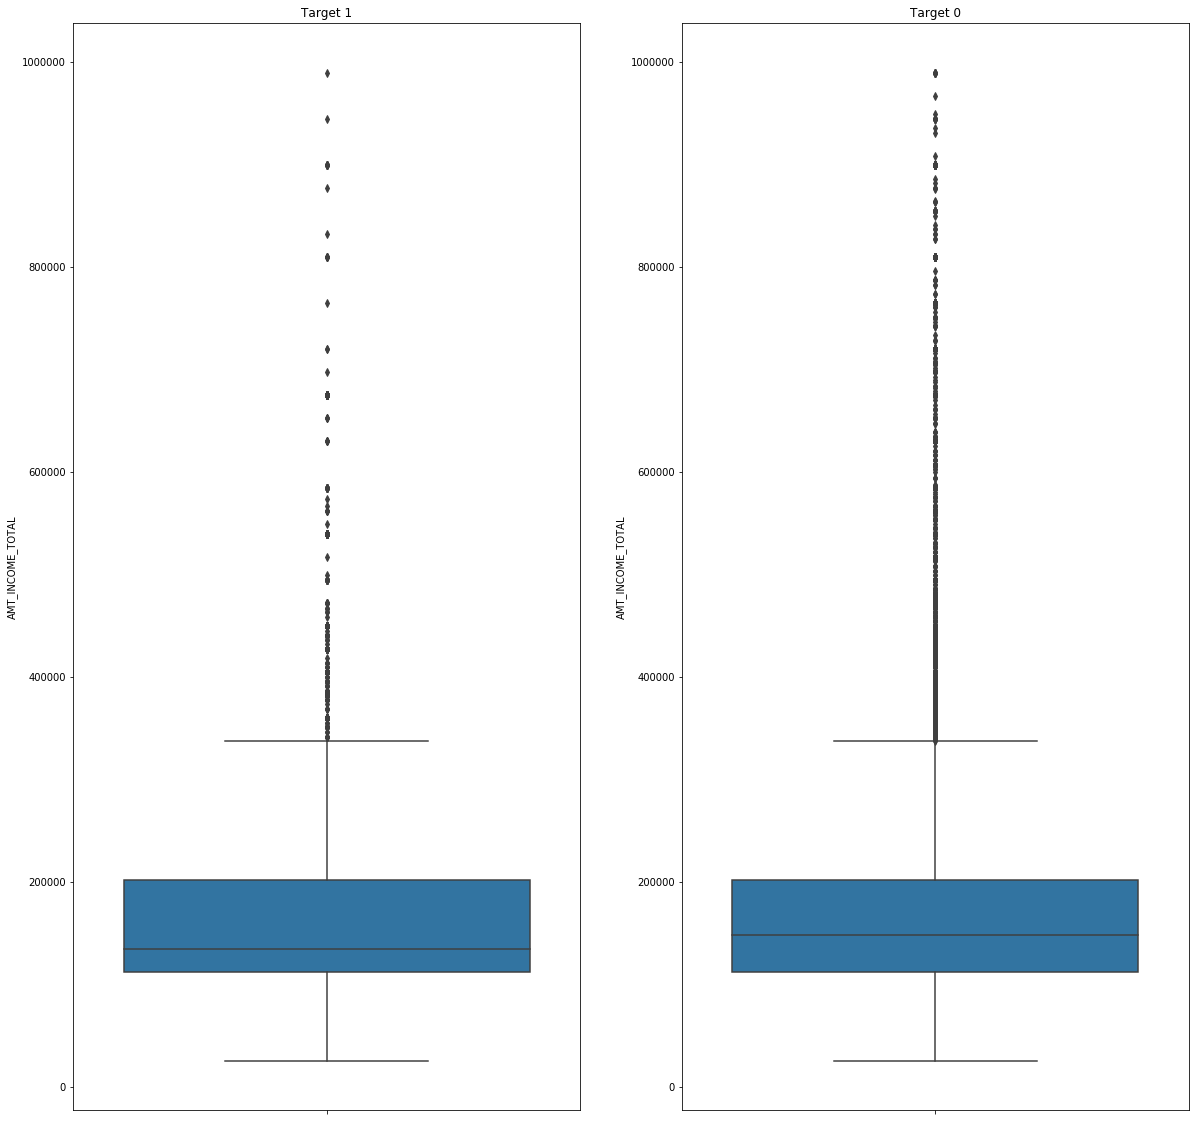

In [123]:
#Income < 1000000
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.title('Target 1')
sns.boxplot(y=revised_App_Data_Target_1[revised_App_Data_Target_1['AMT_INCOME_TOTAL']<1000000]['AMT_INCOME_TOTAL'])
plt.subplot(122)
plt.title('Target 0')
sns.boxplot(y=revised_App_Data_Target_0[revised_App_Data_Target_0['AMT_INCOME_TOTAL']<1000000]['AMT_INCOME_TOTAL'])

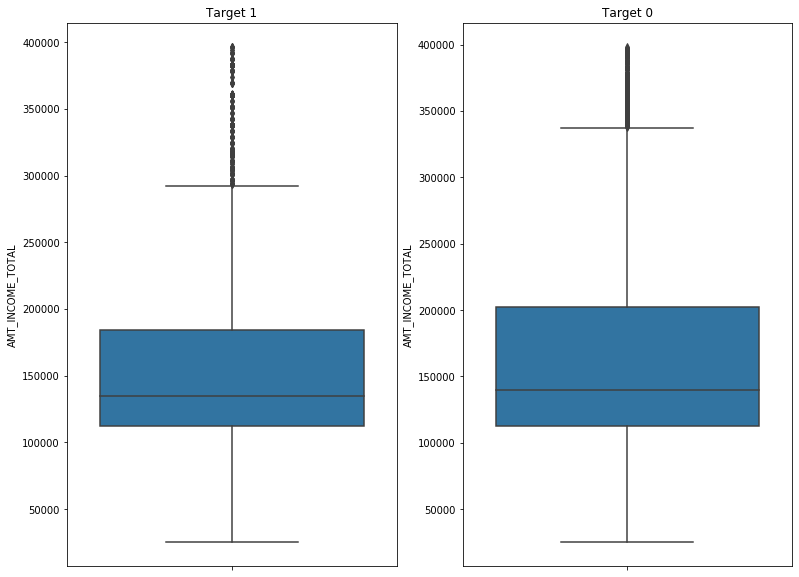

In [191]:
#for income < 400000
plt.figure(figsize=(13,10))
plt.subplot(121)
plt.title('Target 1')
sns.boxplot(y=revised_App_Data_Target_1[revised_App_Data_Target_1['AMT_INCOME_TOTAL']<400000]['AMT_INCOME_TOTAL'])
plt.subplot(122)
plt.title('Target 0')
sns.boxplot(y=revised_App_Data_Target_0[revised_App_Data_Target_0['AMT_INCOME_TOTAL']<400000]['AMT_INCOME_TOTAL'])

### Observation for above plots 

- For people with income more than 10 lac there is very less risk of default
- People with income less than 3 lacs are most likely to face difficulties in payments
- More specifically, majority of people who faced difficulties had income between 1 lac and 2 lacs approximately

#### AMT_ANNUITY

In [125]:
revised_App_Data_Target_1['AMT_ANNUITY'].describe()

count     24816.000000
mean      26479.897848
std       12451.266136
min        2722.500000
25%       17352.000000
50%       25260.750000
75%       32976.000000
max      149211.000000
Name: AMT_ANNUITY, dtype: float64

In [126]:
revised_App_Data_Target_0['AMT_ANNUITY'].isnull().sum()

12

In [127]:
revised_App_Data_Target_0['AMT_ANNUITY'].describe()

count    282639.000000
mean      27164.069539
std       14658.545103
min        1615.500000
25%       16456.500000
50%       24876.000000
75%       34749.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

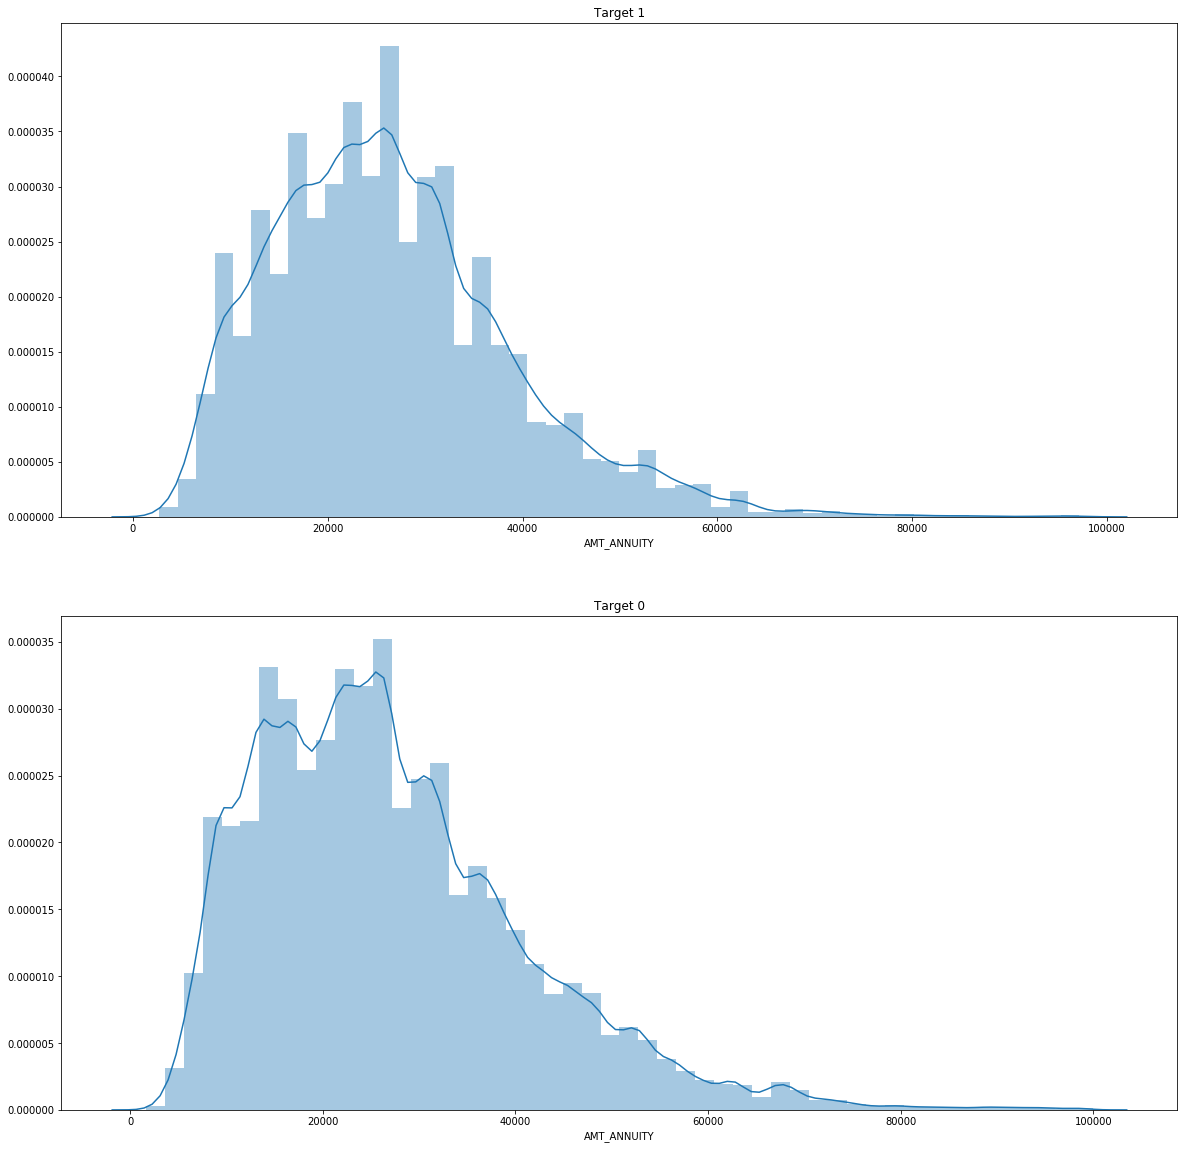

In [128]:
#for annuity < 100000
plt.figure(figsize=(20,20))
plt.subplot(211)
plt.title('Target 1')
sns.distplot(revised_App_Data_Target_1[revised_App_Data_Target_1['AMT_ANNUITY']<100000]['AMT_ANNUITY'])

plt.subplot(212)
plt.title('Target 0')
sns.distplot(revised_App_Data_Target_0[revised_App_Data_Target_0['AMT_ANNUITY']<100000]['AMT_ANNUITY'].dropna())

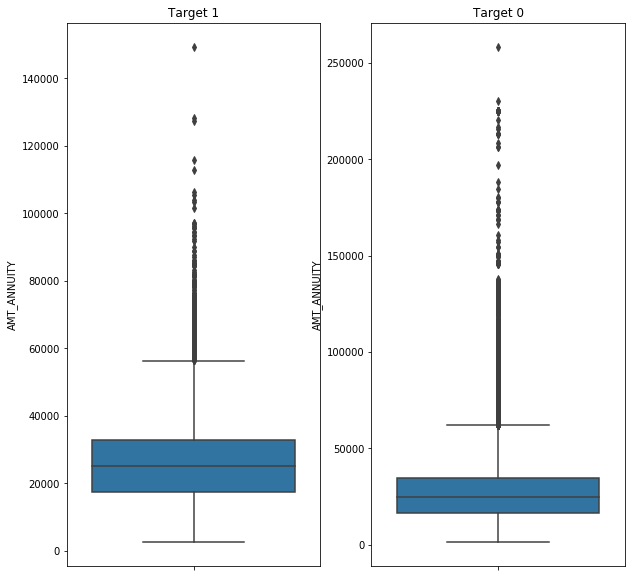

In [129]:
#for all annuity
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.title('Target 1')
sns.boxplot(y=revised_App_Data_Target_1['AMT_ANNUITY'].dropna())

plt.subplot(122)
plt.title('Target 0')
sns.boxplot(y=revised_App_Data_Target_0['AMT_ANNUITY'].dropna())

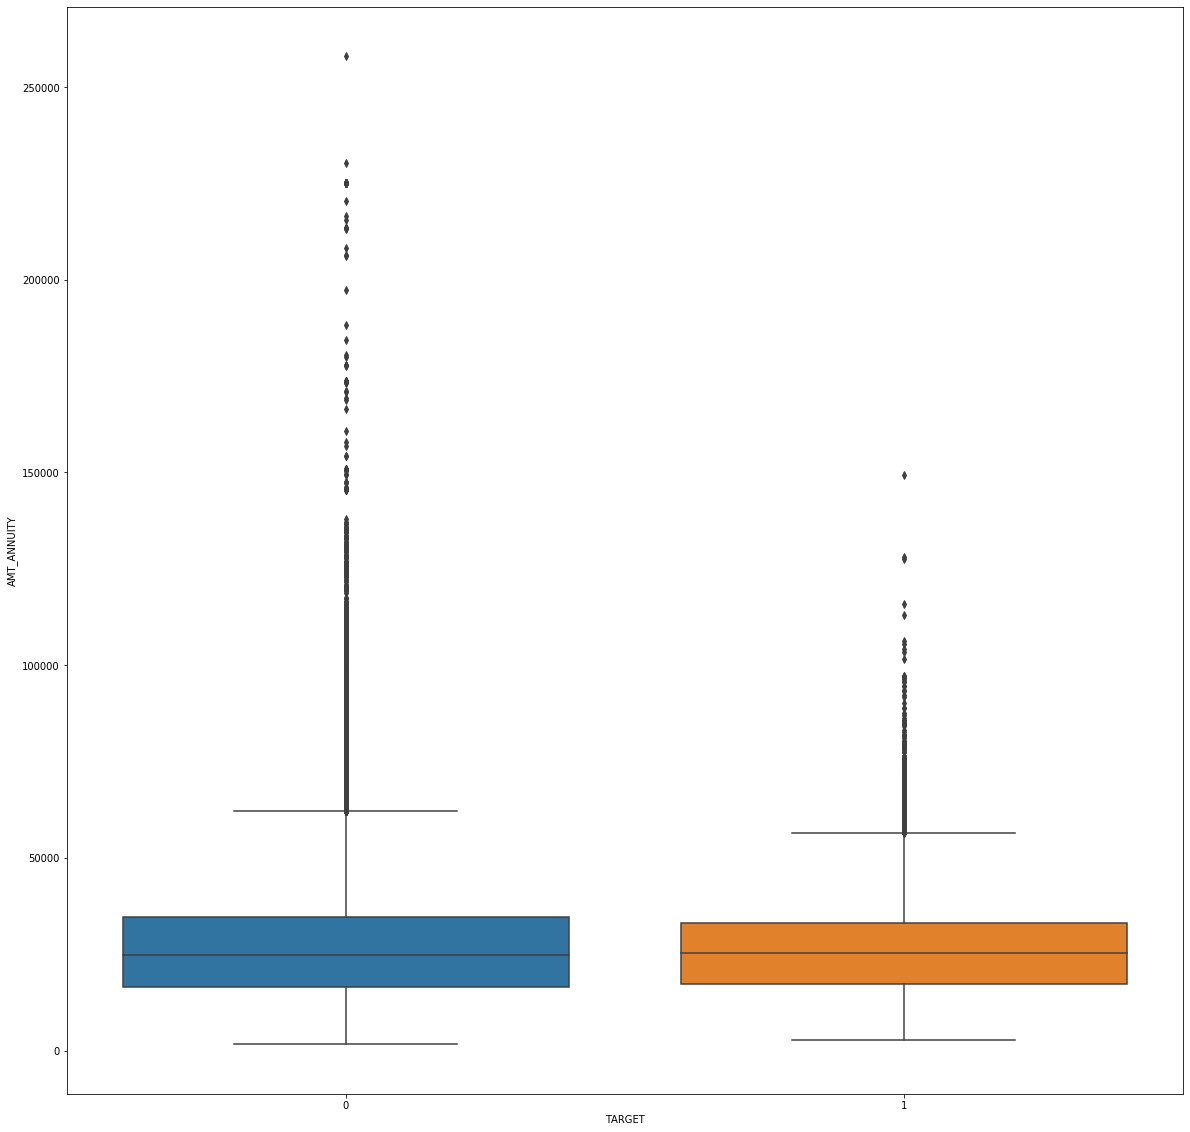

In [130]:
plt.figure(figsize=(20,20))
sns.boxplot(data=revised_Application_Data, x='TARGET', y='AMT_ANNUITY')

### Observation
- AMT_ANNUITY does not seem to have major impact in deciding payment difficulties
- The median and interquartile ranges for both target 0 and 1 are in same range and not varying much
- The maximum value for target 1 is way lower than maximum value of the target 0 ruling out the fact that higher annuity leads to more defaults. 

## Bivariate Analysis

### NAME_FAMILY_STATUS, AMT_ANNUITY - (Categorical - Numerical)

In [131]:
revised_Application_Data['NAME_FAMILY_STATUS'].unique()

array(['Single / not married', 'Married', 'Civil marriage', 'Widow',
       'Separated'], dtype=object)

In [132]:
revised_Application_Data['NAME_FAMILY_STATUS'].value_counts()

Married                 196401
Single / not married     45441
Civil marriage           29771
Separated                19768
Widow                    16086
Name: NAME_FAMILY_STATUS, dtype: int64

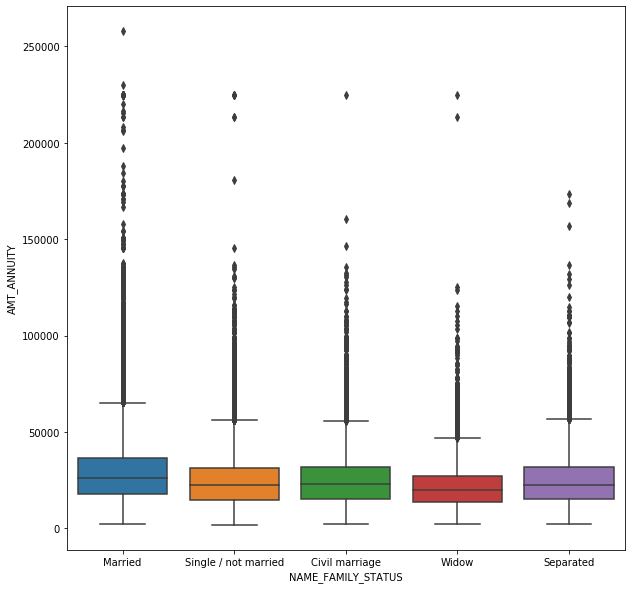

In [133]:
plt.figure(figsize=(10,10))
sns.boxplot(data=revised_App_Data_Target_0,x='NAME_FAMILY_STATUS' ,y='AMT_ANNUITY')

In [134]:
revised_App_Data_Target_0.groupby('NAME_FAMILY_STATUS')['AMT_ANNUITY'].describe(percentiles  =[.25, .5, .75, .90, .99])

,count,mean,std,min,25%,50%,75%,90%,99%,max
NAME_FAMILY_STATUS,,,,,,,,,,
Civil marriage,26810.0,25170.538344,13480.569999,1993.5,15421.500,23069.25,31576.500,42484.95,67500.00,225000.0
Married,181550.0,28684.368218,15073.012444,1980.0,17617.500,26316.00,36666.000,47965.50,72607.50,258025.5
Separated,18148.0,24975.138114,13547.450401,2295.0,15034.500,22704.75,31630.500,42547.50,67203.00,173704.5
Single / not married,40982.0,24568.637878,13828.157396,1615.5,14482.125,22306.50,31098.375,42142.50,67500.00,225000.0
Widow,15149.0,22116.017130,11969.153293,1980.0,13783.500,20020.50,27063.000,37313.10,60186.42,225000.0


### Observation
- For people with no payment difficulties, 
    - Married people tend to have higher average annuity amounts. Median value is also highest for the married people
    - Widows on the contrary have minimum average annuity amounts and the range is also very small comparatively as visible 
    from box plot

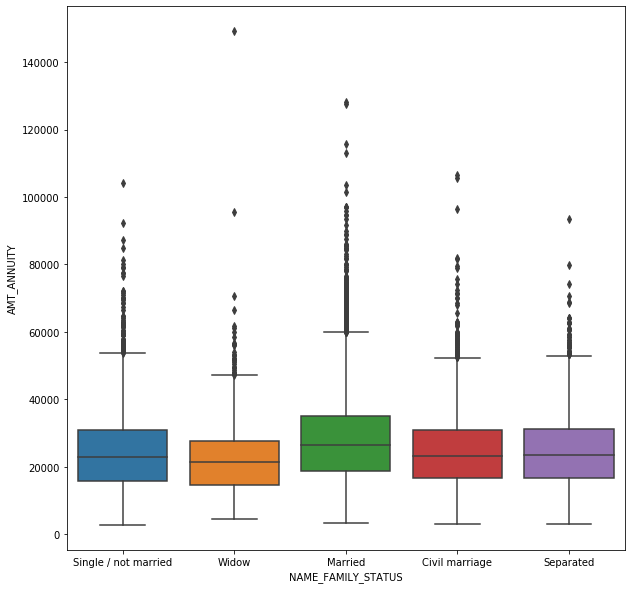

In [135]:
plt.figure(figsize=(10,10))
sns.boxplot(data=revised_App_Data_Target_1,x='NAME_FAMILY_STATUS' ,y='AMT_ANNUITY')

In [136]:
revised_App_Data_Target_1.groupby('NAME_FAMILY_STATUS')['AMT_ANNUITY'].describe(percentiles  =[.25, .5, .75, .90, .99] )

,count,mean,std,min,25%,50%,75%,90%,99%,max
NAME_FAMILY_STATUS,,,,,,,,,,
Civil marriage,2959.0,24795.574856,11806.283749,3172.5,16573.500,23274.0,30906.0,39996.00,59269.50,106380.0
Married,14844.0,27822.184620,12671.814166,3271.5,18643.500,26446.5,35158.5,44487.00,62955.63,128178.0
Separated,1620.0,24912.005556,11533.136514,3172.5,16572.375,23566.5,31180.5,39312.45,60305.76,93510.0
Single / not married,4456.0,24502.280857,11990.006508,2722.5,15786.000,23062.5,31023.0,39980.25,60957.00,104094.0
Widow,937.0,22649.859125,11572.481250,4513.5,14751.000,21420.0,27778.5,35937.00,56285.64,149211.0


### Observation
- In both the cases
    - Married people tend to have higher average annuity amounts. Median value is also highest for the married people
    Widows on the contrary have minimum average annuity amounts and the range is also very small comparatively as visible 
    from box plot

### AMT_INCOME_TOTAL, AMT_CREDIT - (Numerical - Numerical)

#### Target 1

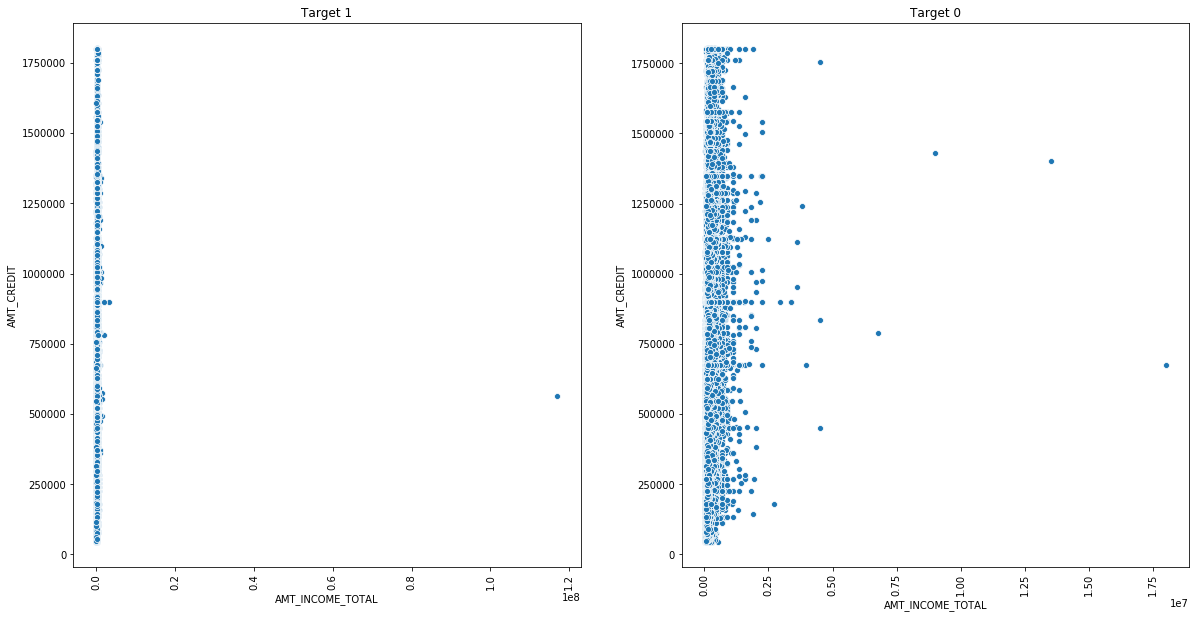

In [137]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.xticks(rotation=90)
plt.title('Target 1')
sns.scatterplot(data=revised_App_Data_Target_1, x='AMT_INCOME_TOTAL', y='AMT_CREDIT')

plt.subplot(122)
plt.xticks(rotation=90)
plt.title('Target 0')
sns.scatterplot(data=revised_App_Data_Target_0, x='AMT_INCOME_TOTAL', y='AMT_CREDIT')

### Observation
- For Target 1
    - Most of the credit is concentrated for people with lower income ranges(<2 lacs)
- For Target 0 
    - Considerable Credit flows are in higher ranges as well. 
- We may say that lower income people are more likely to face payment difficulties

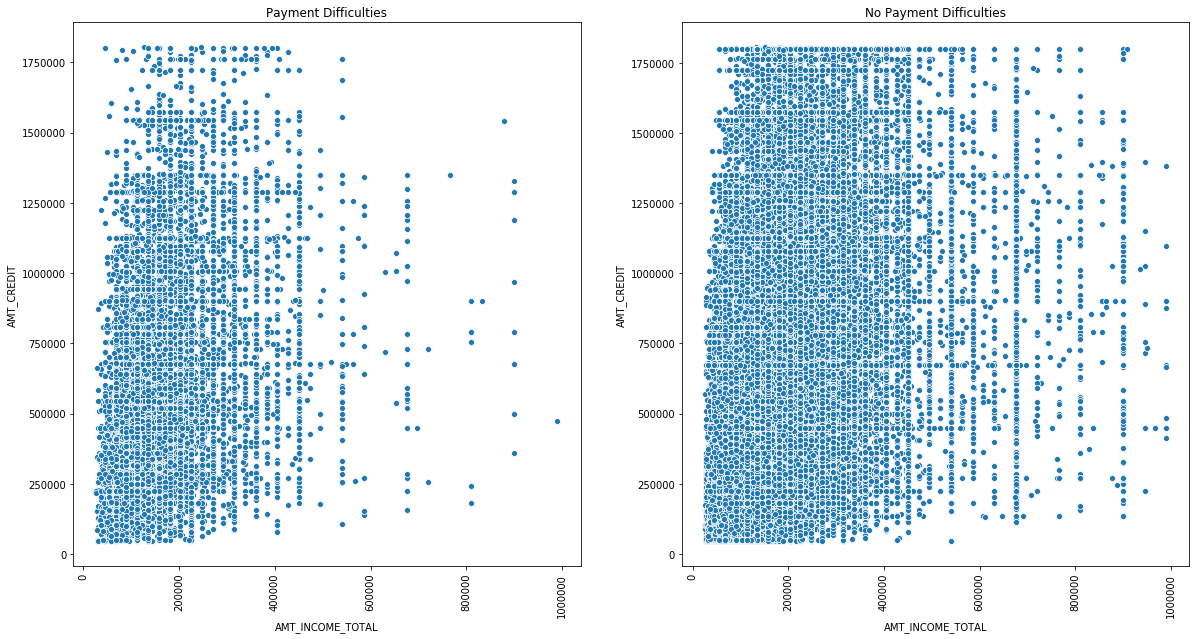

In [192]:
## lets zoom in 
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.xticks(rotation=90)
plt.title('Payment Difficulties')
sns.scatterplot(data=revised_App_Data_Target_1[revised_App_Data_Target_1['AMT_INCOME_TOTAL']<1000000], x='AMT_INCOME_TOTAL', y='AMT_CREDIT')

plt.subplot(122)
plt.xticks(rotation=90)
plt.title('No Payment Difficulties')
sns.scatterplot(data=revised_App_Data_Target_0[revised_App_Data_Target_0['AMT_INCOME_TOTAL']<1000000],x='AMT_INCOME_TOTAL', y='AMT_CREDIT')

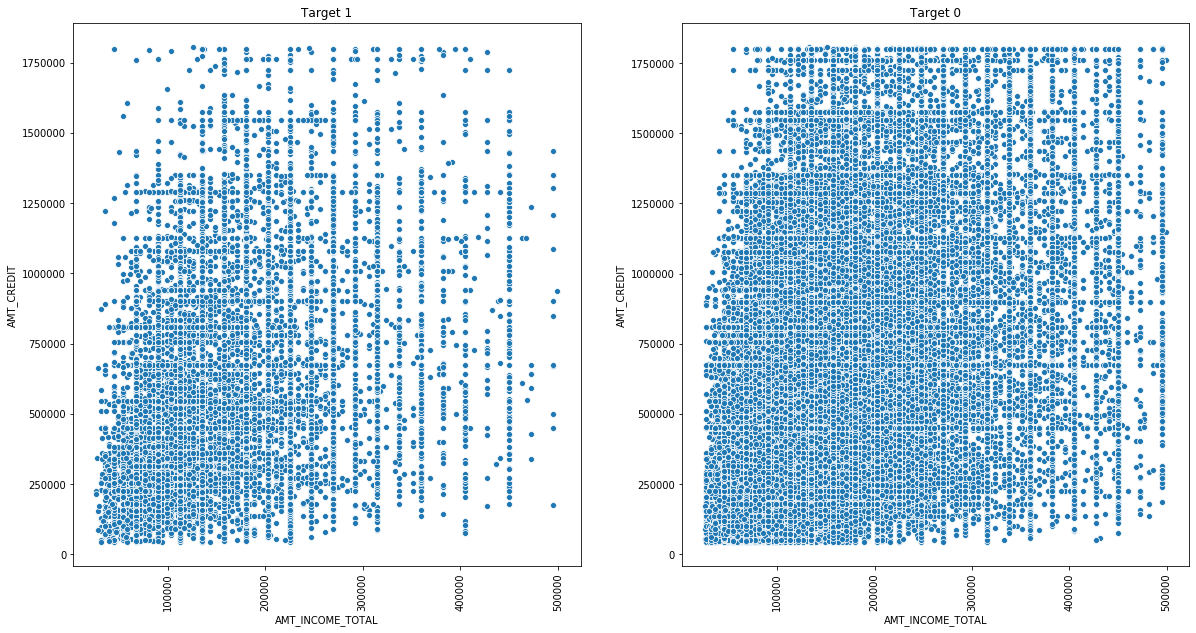

In [139]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.xticks(rotation=90)
plt.title('Target 1')
sns.scatterplot(data=revised_App_Data_Target_1[revised_App_Data_Target_1['AMT_INCOME_TOTAL']<500000], x='AMT_INCOME_TOTAL', y='AMT_CREDIT')

plt.subplot(122)
plt.xticks(rotation=90)
plt.title('Target 0')
sns.scatterplot(data=revised_App_Data_Target_0[revised_App_Data_Target_0['AMT_INCOME_TOTAL']<500000],x='AMT_INCOME_TOTAL', y='AMT_CREDIT')

### Observation from graphs above.
- Upper limits of the credits in case of people with payment difficulties is less. 
- Most of the payment difficulties are associated with the people with incomes less than 5 lacs

### NAME_EDUCATION_TYPE , AMT_CREDIT

In [140]:
revised_App_Data_Target_1['NAME_EDUCATION_TYPE'].value_counts(normalize=True)

Secondary / secondary special    0.786468
Higher education                 0.161468
Incomplete higher                0.035139
Lower secondary                  0.016804
Academic degree                  0.000121
Name: NAME_EDUCATION_TYPE, dtype: float64

In [141]:
revised_App_Data_Target_0['NAME_EDUCATION_TYPE'].value_counts(normalize=True)

Secondary / secondary special    0.703489
Higher education                 0.250652
Incomplete higher                0.033274
Lower secondary                  0.012015
Academic degree                  0.000570
Name: NAME_EDUCATION_TYPE, dtype: float64

In [142]:
revised_App_Data_Target_1[revised_App_Data_Target_1['AMT_INCOME_TOTAL']<1000000].groupby('NAME_EDUCATION_TYPE')['AMT_INCOME_TOTAL'].describe(percentiles=[.25,.5,.75,.9,.95,.99])

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
NAME_EDUCATION_TYPE,,,,,,,,,,,
Academic degree,3.0,322500.000000,46837.484988,270000.0,303750.0,337500.0,348750.0,355500.0,357750.0,359550.0,360000.0
Higher education,4002.0,194155.714768,101323.305269,27000.0,135000.0,180000.0,225000.0,315000.0,382500.0,540000.0,990000.0
Incomplete higher,871.0,175119.504592,90698.840164,36000.0,112500.0,157500.0,214875.0,270000.0,360000.0,540000.0,810000.0
Lower secondary,417.0,129005.395683,57230.719069,31500.0,90000.0,117000.0,157500.0,202500.0,225000.0,311400.0,450000.0
Secondary / secondary special,19510.0,153249.305766,74008.117843,25650.0,110250.0,135000.0,180000.0,234000.0,292500.0,405000.0,945000.0


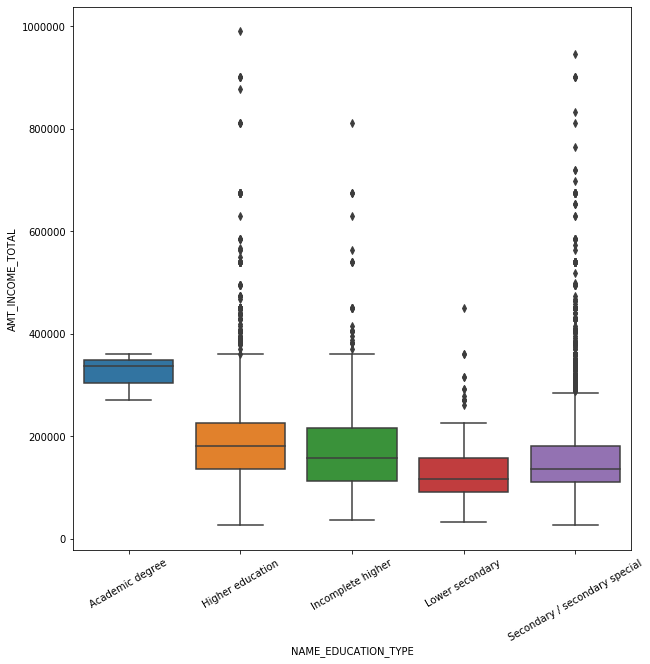

In [143]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=30)
sns.boxplot(data=revised_App_Data_Target_1[revised_App_Data_Target_1['AMT_INCOME_TOTAL']<1000000],x='NAME_EDUCATION_TYPE' ,y='AMT_INCOME_TOTAL')

### Observation
- There are only 3 cases of default for clients with Academic degree and those are in middle income range. 
- Clients with Lower seconday education level are more likely to default for AMT_INCOME_TOTAL < 400000

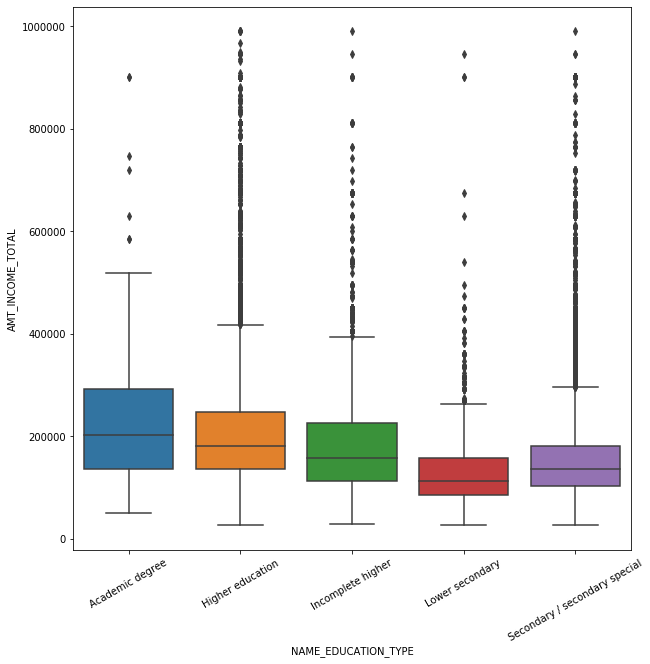

In [144]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=30)
sns.boxplot(data=revised_App_Data_Target_0[revised_App_Data_Target_0['AMT_INCOME_TOTAL']<1000000],x='NAME_EDUCATION_TYPE' ,y='AMT_INCOME_TOTAL')

In [145]:
revised_App_Data_Target_0[revised_App_Data_Target_0['AMT_INCOME_TOTAL']<1000000].groupby('NAME_EDUCATION_TYPE')['AMT_INCOME_TOTAL'].describe(percentiles=[.25,.5,.75,.9,.95,.99])

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
NAME_EDUCATION_TYPE,,,,,,,,,,,
Academic degree,161.0,238472.049689,144558.373681,49500.0,135000.0,202500.0,292500.0,405000.0,450000.0,808200.0,900000.0
Higher education,70676.0,205795.737920,112008.462523,27000.0,135000.0,180000.0,247500.0,342000.0,414000.0,675000.0,990000.0
Incomplete higher,9401.0,181460.452239,93477.751834,28161.0,112500.0,157500.0,225000.0,292500.0,360000.0,540000.0,990000.0
Lower secondary,3394.0,129541.126105,69401.083461,26460.0,85500.0,112500.0,157500.0,202500.0,247500.0,360000.0,945000.0
Secondary / secondary special,198782.0,154230.876298,76658.136651,25650.0,103500.0,135000.0,180000.0,247500.0,292500.0,405000.0,990000.0


### Observation
- Clients with Lower seconday education level are more likely to default for AMT_INCOME_TOTAL < 400000
- Majority of on time paying clients lies in higher range of AMT_INCOME_TOTAL
- Clients with Lower secondary who opted for large sum of loan (945000.0) have paid on time while clients of same education who took loans of moderate size (450000.0) have defaulted.

# Loading csv Previous_Application

In [146]:
previousApplication = pd.read_csv("previous_application.csv", encoding="unicode_escape")

In [147]:
previousApplication.size

61797918

In [148]:
previousApplication.shape

(1670214, 37)

In [149]:
previousApplication.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

In [150]:
previousApplication.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


# Merging with dataframe previousApplication

#### Performing inner join between revised_Application_Data and previousApplication on SK_ID_CURR 

In [151]:
merged_Data = revised_Application_Data.merge(previousApplication, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')
merged_Data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,NAME_INCOME_TYPE,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,Y,0,202500.0,406597.5,24700.5,Working,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,0,270000.0,1293502.5,35698.5,State servant,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,0,270000.0,1293502.5,35698.5,State servant,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,0,270000.0,1293502.5,35698.5,State servant,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,0,67500.0,135000.0,6750.0,Working,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [152]:
merged_Data.size

97533570

In [153]:
merged_Data.shape

(1413530, 69)

In [154]:
revised_Application_Data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_CONT_MOBILE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'income_bins', 'AGE', 'AgeGroup'],
      dtype='object')

In [155]:
previousApplication.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

In [156]:
#Subsetting the merged_Data on the basis of NAME_CONTRACT_STATUS
merged_Data.NAME_CONTRACT_STATUS.unique()

array(['Approved', 'Canceled', 'Refused', 'Unused offer'], dtype=object)

In [157]:
merged_Data_Approved = merged_Data[(merged_Data.NAME_CONTRACT_STATUS == "Approved")]
merged_Data_Canceled = merged_Data[(merged_Data.NAME_CONTRACT_STATUS == "Canceled")]
merged_Data_Refused = merged_Data[(merged_Data.NAME_CONTRACT_STATUS == "Refused")]
merged_Data_Unused = merged_Data[(merged_Data.NAME_CONTRACT_STATUS == "Unused offer")]

## Univariate Analysis

#### NAME_CONTRACT_STATUS - Categorical Unordered

In [158]:
#Let's observe NAME_CONTRACT_STATUS column
Plot_Data = pd.DataFrame(merged_Data.NAME_CONTRACT_STATUS.value_counts(normalize=True)*100).reset_index()
Plot_Data.columns = ["CONTRACT_STATUS", "PERCENT"]
Plot_Data

,CONTRACT_STATUS,PERCENT
0,Approved,62.678613
1,Canceled,18.352706
2,Refused,17.358033
3,Unused offer,1.610649


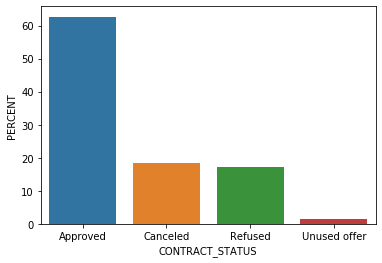

In [159]:
sns.barplot(x='CONTRACT_STATUS', y='PERCENT', data=Plot_Data)
plt.show()

### Observation
- Most number of application in this bank is Approved
- Count of Canceled and Refused is fairly same but significantly less than Approved
- It is safe to say that the loan application is significantly likely to get Approved than to get canceled

#### NAME_CLIENT_TYPE - Categorical Unordered

In [160]:
#Let's observe NAME_CLIENT_TYPE column
Plot_Data = pd.DataFrame(merged_Data.NAME_CLIENT_TYPE.value_counts(normalize=True)*100).reset_index()
Plot_Data.columns = ["CLIENT_TYPE", "PERCENT"]
Plot_Data

,CLIENT_TYPE,PERCENT
0,Repeater,73.402687
1,New,18.358082
2,Refreshed,8.130072
3,XNA,0.109159


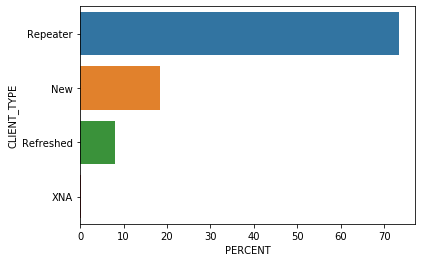

In [161]:
sns.barplot(y='CLIENT_TYPE', x='PERCENT', data=Plot_Data)
plt.show()

### Observation
- Most of the applications are from Repeaters.
- Clients are loyal to the bank
- There are decent New applications too. Hence, the banks might have some attractive offers since it is attracting new applications too

#### NAME_EDUCATION_TYPE - Categorical Ordered

In [162]:
#Let's observe NAME_EDUCATION_TYPE column
Plot_Data = pd.DataFrame(merged_Data.NAME_EDUCATION_TYPE.value_counts(normalize=True)*100).reset_index()
Plot_Data.columns = ["EDUCATION_TYPE", "PERCENT"]
Plot_Data

,EDUCATION_TYPE,PERCENT
0,Secondary / secondary special,73.416765
1,Higher education,22.130199
2,Incomplete higher,3.198446
3,Lower secondary,1.213628
4,Academic degree,0.040961


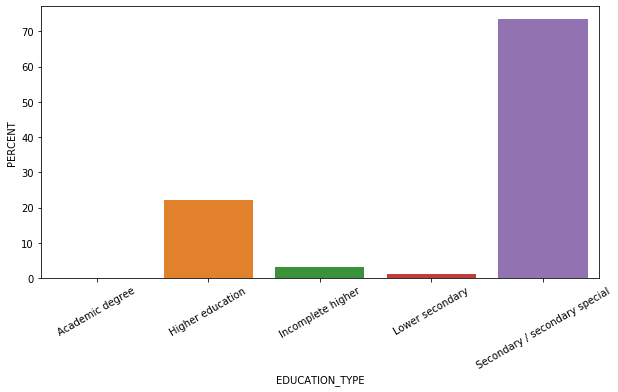

In [163]:
plt.figure(figsize=[10, 5])
plt.xticks(rotation=30)
sns.barplot(x='EDUCATION_TYPE', y='PERCENT', data=Plot_Data)
plt.show()

### Observation
- Most loan business to this bank comes from clients with Secondary / secondary special education.
- After secondary special, clients with Higher educations have a decent share of loan applications
- Clients with Academic degree rarely apply for loan in this bank.

#### NAME_FAMILY_STATUS - Categorical

In [164]:
#Let's observe NAME_FAMILY_STATUS column
Plot_Data = pd.DataFrame(merged_Data.NAME_FAMILY_STATUS.value_counts(normalize=True)*100).reset_index()
Plot_Data.columns = ["FAMILY_STATUS", "PERCENT"]
Plot_Data

,FAMILY_STATUS,PERCENT
0,Married,64.432520
1,Single / not married,13.204389
2,Civil marriage,10.126775
3,Separated,6.461341
4,Widow,5.774975


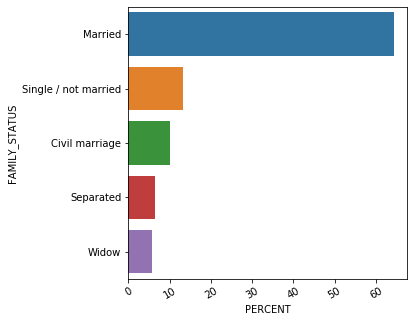

In [165]:
plt.figure(figsize=[5, 5])
plt.xticks(rotation=30)
sns.barplot(y='FAMILY_STATUS', x='PERCENT', data=Plot_Data)
plt.show()

### Observation
- Married clients significantly have the highest share in loan applications.
- Since married clients have a family to support it makes sense for maximum loan applications coming from married clients.
- Single and Civil marriage clients have relativey less loan applications.

#### RATE_INTEREST_PRIMARY - Numerical

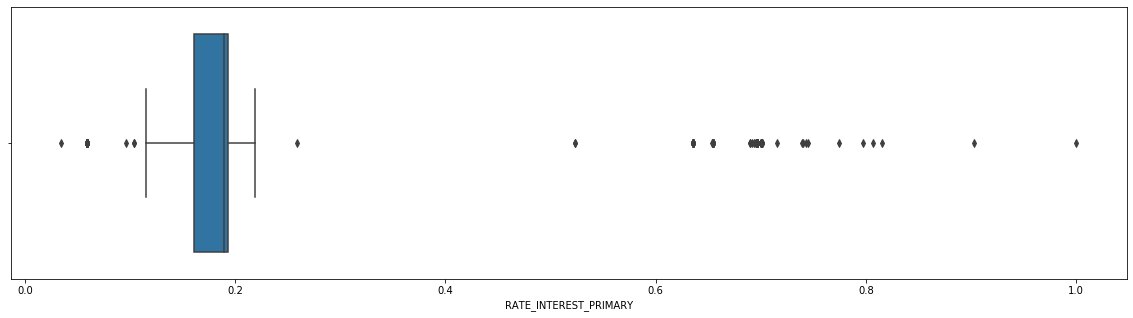

In [166]:
plt.figure(figsize=[20, 5])
sns.boxplot(merged_Data.RATE_INTEREST_PRIMARY)
plt.show()

### Observation
- Most of the loan applications have a RATE_INTEREST_PRIMARY less than 0.3
- There are also some clients who have agreed with higher RATE_INTEREST_PRIMARY, say between 0.6 and 1.0

#### DAYS_DECISION - Numerical

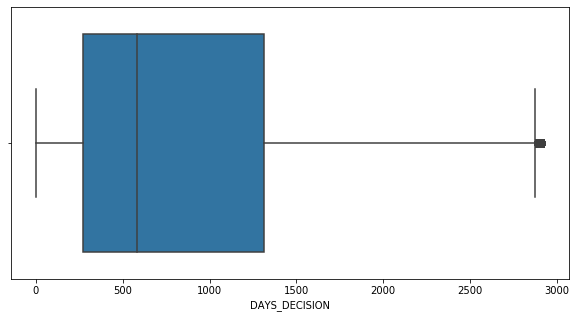

In [167]:
plt.figure(figsize=[10,5])
sns.boxplot(abs(merged_Data.DAYS_DECISION))
plt.show()

In [168]:
abs(merged_Data.DAYS_DECISION.mean())

880.3634524912807

### Observation
- The bank takes a 880 days on an average to reach a decision for a loan application
- There are a few cases where bank provides instant loan too. 
- The median lies arouing 600 days and the 99 percentile lies around 2900 days. Hence, half of the loans are approved sooner than the others

## Bivariate Analysis 

#### NAME_CLIENT_TYPE, NAME_CONTRACT_STATUS - (Categorical - Categorical)

In [169]:
merged_Data.NAME_CLIENT_TYPE.unique()

array(['New', 'Repeater', 'Refreshed', 'XNA'], dtype=object)

In [170]:
#Grouping the merged data on basis of ['NAME_CONTRACT_STATUS', 'NAME_CLIENT_TYPE']
grouped_Data = pd.DataFrame(merged_Data.groupby(['NAME_CONTRACT_STATUS', 'NAME_CLIENT_TYPE']).count()).reset_index()
grouped_Data[['NAME_CONTRACT_STATUS', 'NAME_CLIENT_TYPE', 'SK_ID_CURR']]

,NAME_CONTRACT_STATUS,NAME_CLIENT_TYPE,SK_ID_CURR
0,Approved,New,242355
1,Approved,Refreshed,82877
2,Approved,Repeater,560314
3,Approved,XNA,435
4,Canceled,New,2918
5,Canceled,Refreshed,16104
6,Canceled,Repeater,239600
7,Canceled,XNA,799
8,Refused,New,12358
9,Refused,Refreshed,12537


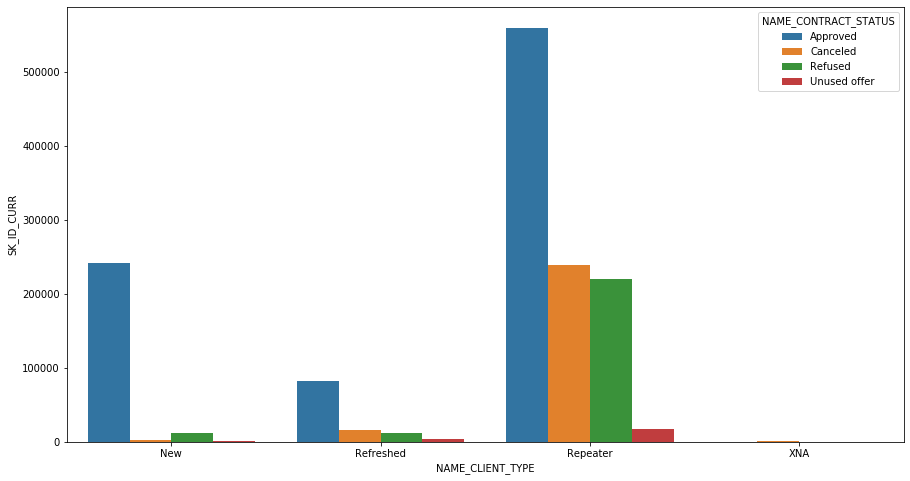

In [171]:
plt.figure(figsize=[15,8])
sns.barplot(x = 'NAME_CLIENT_TYPE', y='SK_ID_CURR', hue = 'NAME_CONTRACT_STATUS', data=grouped_Data)

### Observation
- The count of repeaters is high, clients are loyal to the bank
- The Approved percentage is high for New, Refresher and Repeater. It is significantly higher for Repeater.
- The percentage for Canceled and Refused is also signifanctly higher for Repeater.
- Refreshed clients have slightly higher Canceled percentage as compared to New clients

#### NAME_TYPE_SUITE, NAME_CONTRACT_STATUS - (Categorical - Categorical)

In [172]:
merged_Data.NAME_TYPE_SUITE.unique()

array([nan, 'Unaccompanied', 'Family', 'Spouse, partner', 'Children',
       'Other_A', 'Other_B', 'Group of people'], dtype=object)

In [173]:
#Grouping the merged data on basis of ['NAME_CONTRACT_STATUS', 'NAME_TYPE_SUITE']
grouped_Data = pd.DataFrame(merged_Data.groupby(['NAME_CONTRACT_STATUS', 'NAME_TYPE_SUITE']).count()).reset_index()

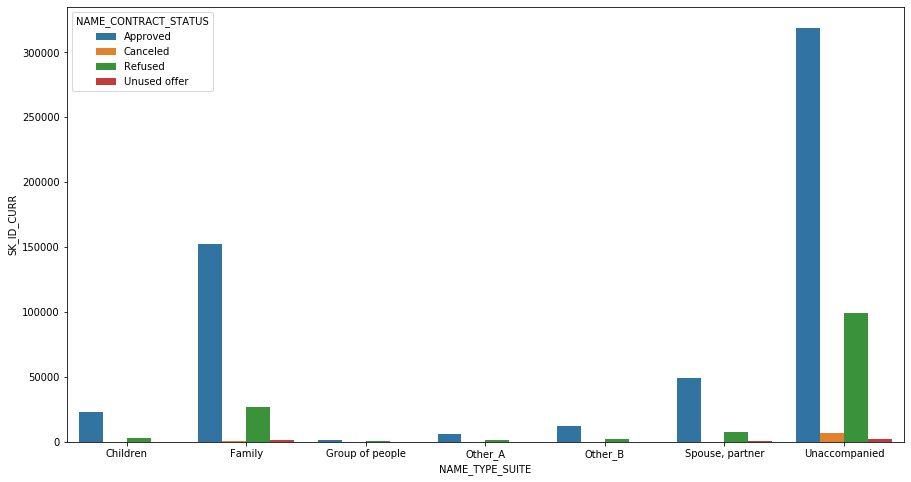

In [174]:
plt.figure(figsize=[15,8])
sns.barplot(x = 'NAME_TYPE_SUITE', y='SK_ID_CURR', hue = 'NAME_CONTRACT_STATUS', data=grouped_Data)

### Observation 
- Clients are mostly unaccompanied when filing for a loan
- Approved is signifcantly high for clients accompanied by Family and Unaccompanied.
- Refused is also high for clients accompanied by Family and Unaccompanied.
- Canceled have a slightly signifcant share of data in case of Unaccompanied clients

#### NAME_PAYMENT_TYPE, NAME_CONTRACT_STATUS - (Categorical - Categorical)

In [175]:
merged_Data.NAME_PAYMENT_TYPE.unique()

array(['XNA', 'Cash through the bank', 'Non-cash from your account',
       'Cashless from the account of the employer'], dtype=object)

In [176]:
#Grouping the merged data on basis of ['NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE']
grouped_Data = pd.DataFrame(merged_Data.groupby(['NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE']).count()).reset_index()

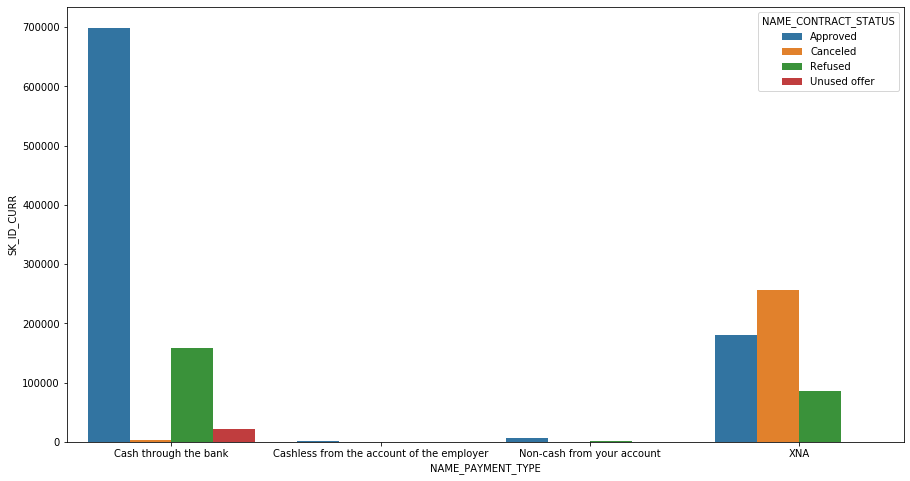

In [177]:
plt.figure(figsize=[15,8])
sns.barplot(x = 'NAME_PAYMENT_TYPE', y='SK_ID_CURR', hue = 'NAME_CONTRACT_STATUS', data=grouped_Data)

### Observation
- Mostly payments are done by cash through the bank by clients
- Refused has a significant share of data for client paying by cash through the bank
- Canceled is significantly very high for XNA. It is even higher than the Approved count

#### AMT_APPLICATION, NAME_CONTRACT_STATUS - (Numerical - Categorical)

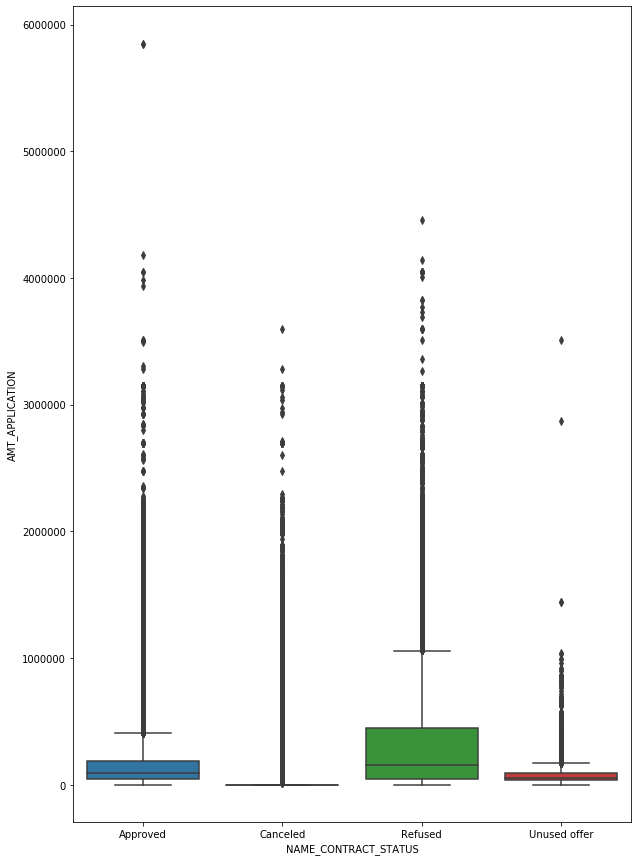

In [178]:
#Plotting graph on merged_Data for a common scale
plt.figure(figsize=[10,15])
sns.boxplot(data=merged_Data, x='NAME_CONTRACT_STATUS', y='AMT_APPLICATION')

### Observation
- Interquantile range for Refused is concentrated in AMT_APPLICATION < 1000000. Hence, loans < 10 Lac are refused highly
- Interquantile range for Approved is mostly in AMT_APPLICATION < 500000. Hence, loans < 5 Lac are easily approved
- Canceled is densely populated around 0. Hence, it is safe to say that the loan application is relatively rarely canceled.
- The highest value is for Approved. 

# One Major Observation

In [179]:
#We are trying to observe whether the highest amount application were approved or not.
#Also, we are trying to figure where the clients defaulted or not
merged_Data[merged_Data.AMT_APPLICATION > 5000000][['SK_ID_CURR', 'AMT_APPLICATION', 'NAME_CONTRACT_STATUS', 'TARGET']]

,SK_ID_CURR,AMT_APPLICATION,NAME_CONTRACT_STATUS,TARGET
975055,346243,5850000.0,Approved,0
975056,346243,5850000.0,Approved,0


- As observed, bank has given out only two loans for AMT_APPLICATION > 5000000.
- Both these applications were Approved
- Evidently, the clients for both these cases have paid back on time as TARGET = 0